# Proyecto Procesamiento de Datos a Gran Escala
- Realizado por: Juan Andres Lopez Escalante
- Correo: jandreslopez@javeriana.edu.co
- Fecha: 25/05/2025
- Presentado a: John Jairo Corredor Franco, PhD

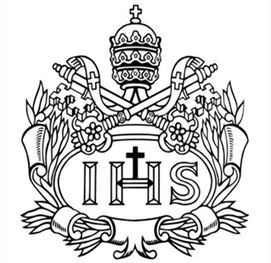

In [ ]:
# Librerías para manipulación de datos
import pandas as pd
import numpy as np

# Librerías para visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Librerías del sistema de archivos
import os
import glob

# Librerías para modelos predictivos
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Librerías para clustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA  # (si decides usarlo para visualizar clusters)

# Librerías estadísticas
from scipy import stats

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 1. Definir la carpeta base donde están los archivos
base_dir = '/content/drive/MyDrive/Proyecto Procesamiento'

# 2. Construir el patrón para buscar archivos del tipo 'Examen_Saber_11_*.txt'
pattern = os.path.join(base_dir, 'Examen_Saber_11_*2.txt')
files = sorted(glob.glob(pattern))

# 3. Leer y concatenar archivos encontrados
if not files:
    print(f"No se encontraron archivos con el patrón: {pattern}")
else:
    print(f"Archivos encontrados: {len(files)}")
    df_list = []

    for fp in files:
        try:
            tmp = pd.read_csv(fp, sep=';', dtype={
                'periodo': int,
                'cole_calendario': 'category',
                'cole_cod_mcpio_ubicacion': float  # se convertirá luego a int si es necesario
            })
            df_list.append(tmp)
        except Exception as e:
            print(f"Error al leer {fp}: {e}")

    if df_list:
        df = pd.concat(df_list, ignore_index=True)
        del df_list
        print("DataFrame consolidado exitosamente.")
    else:
        print("No se pudieron cargar archivos correctamente.")


Archivos encontrados: 8


<ipython-input-2-b64923a872c9>:17: DtypeWarning: Columns (4,5,7,13,14,15,16,17,18,19,20,31,32,40,46,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72) have mixed types. Specify dtype option on import or set low_memory=False.
  tmp = pd.read_csv(fp, sep=';', dtype={
<ipython-input-2-b64923a872c9>:17: DtypeWarning: Columns (4,5,7,13,14,15,16,17,18,19,20,31,32,41,47,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72) have mixed types. Specify dtype option on import or set low_memory=False.
  tmp = pd.read_csv(fp, sep=';', dtype={
<ipython-input-2-b64923a872c9>:17: DtypeWarning: Columns (4,5,7,13,14,15,16,17,18,19,20,41,59) have mixed types. Specify dtype option on import or set low_memory=False.
  tmp = pd.read_csv(fp, sep=';', dtype={
<ipython-input-2-b64923a872c9>:17: DtypeWarning: Columns (4,5,7,13,14,15,16,17,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  tmp = pd.read_csv(fp, sep=';', dtype={
<ipython-input-2-b64923a872c

DataFrame consolidado exitosamente.


In [ ]:
df.shape

(4761554, 86)

In [ ]:
df.columns

Index(['periodo', 'estu_consecutivo', 'estu_estudiante', 'estu_tipodocumento',
       'cole_area_ubicacion', 'cole_bilingue', 'cole_calendario',
       'cole_caracter', 'cole_cod_dane_establecimiento', 'cole_cod_dane_sede',
       'cole_cod_depto_ubicacion', 'cole_cod_mcpio_ubicacion',
       'cole_codigo_icfes', 'cole_depto_ubicacion', 'cole_genero',
       'cole_jornada', 'cole_mcpio_ubicacion', 'cole_naturaleza',
       'cole_nombre_establecimiento', 'cole_nombre_sede',
       'cole_sede_principal', 'desemp_c_naturales', 'desemp_ingles',
       'desemp_lectura_critica', 'desemp_matematicas',
       'desemp_sociales_ciudadanas', 'estu_agregado',
       'estu_cod_depto_presentacion', 'estu_cod_mcpio_presentacion',
       'estu_cod_reside_depto', 'estu_cod_reside_mcpio',
       'estu_dedicacioninternet', 'estu_dedicacionlecturadiaria',
       'estu_depto_presentacion', 'estu_depto_reside', 'estu_discapacidad',
       'estu_etnia', 'estu_fechanacimiento', 'estu_genero', 'estu_grado',
  

In [ ]:
df.shape

(4761554, 86)

In [ ]:
# 2. Selección de columnas
keep = [
    # Meta
    "periodo",
    "cole_cod_mcpio_ubicacion",

    # Características del estudiante
    "estu_genero",
    "estu_fechanacimiento",
    "estu_nse_individual",
    "estu_etnia",
    "estu_discapacidad",
    "estu_dedicacioninternet",

    # Contexto familiar
    "fami_estratovivienda",
    "fami_educacionmadre",
    "fami_educacionpadre",
    "fami_numlibros",
    "fami_personashogar",
    "fami_tieneinternet",
    "fami_tienecomputador",
    "fami_tieneconsolavideojuegos",
    "fami_cuartoshogar",

    # Características del colegio
    "cole_naturaleza",
    "cole_area_ubicacion",
    "cole_calendario",
    "cole_caracter",
    "cole_jornada",
    "cole_bilingue",

    # Resultados Examen Saber 11
    "punt_global",
    "percentil_global",
    "punt_lectura_critica",
    "percentil_lectura_critica",
    "punt_matematicas",
    "percentil_matematicas",
    "punt_c_naturales",
    "percentil_c_naturales",
    "punt_sociales_ciudadanas",
    "percentil_sociales_ciudadanas",
    "punt_ingles",
    "percentil_ingles"
]

df = df.loc[:, keep]

In [ ]:
df.shape

(4761554, 35)

In [ ]:
df.head()

,periodo,cole_cod_mcpio_ubicacion,estu_genero,estu_fechanacimiento,estu_nse_individual,estu_etnia,estu_discapacidad,estu_dedicacioninternet,fami_estratovivienda,fami_educacionmadre,...,punt_lectura_critica,percentil_lectura_critica,punt_matematicas,percentil_matematicas,punt_c_naturales,percentil_c_naturales,punt_sociales_ciudadanas,percentil_sociales_ciudadanas,punt_ingles,percentil_ingles
0,20172,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,...,43,15,36,13,37,9,34,7,46.0,42.0
1,20172,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,...,0,1,0,1,0,1,0,1,0.0,1.0
2,20172,50313.0,F,04/09/1999,NSE2,NaN,N,Entre 30 y 60 minutos,Estrato 1,Primaria incompleta,...,45,23,51,55,48,39,50,52,53.0,67.0
3,20172,73001.0,M,10/06/2000,NSE3,NaN,N,No Navega Internet,Estrato 2,Secundaria (Bachillerato) completa,...,50,38,48,46,45,29,37,12,49.0,54.0
4,20172,68001.0,F,08/05/2001,NSE3,NaN,N,Entre 1 y 3 horas,Estrato 3,Técnica o tecnológica completa,...,78,100,74,98,74,100,70,96,70.0,94.0


In [ ]:
# 3. Filtrar únicamente calendario A y segunda aplicación (periodo termina en 2)
df = df.loc[
    (df['cole_calendario'] == 'A') &
    (df['periodo'] % 10 == 2),
    :
]

In [ ]:
df.isna().sum()

,0
periodo,0
cole_cod_mcpio_ubicacion,0
estu_genero,323
estu_fechanacimiento,1
estu_nse_individual,190782
estu_etnia,4154184
estu_discapacidad,0
estu_dedicacioninternet,292300
fami_estratovivienda,243359
fami_educacionmadre,272895


In [ ]:
missing_frac = df.isna().mean()
missing_frac

,0
periodo,0.000000e+00
cole_cod_mcpio_ubicacion,0.000000e+00
estu_genero,7.412679e-05
estu_fechanacimiento,2.294947e-07
estu_nse_individual,4.378346e-02
estu_etnia,9.533632e-01
estu_discapacidad,0.000000e+00
estu_dedicacioninternet,6.708130e-02
fami_estratovivienda,5.584960e-02
fami_educacionmadre,6.262796e-02


In [ ]:
#Eliminar varaible estu_etnia
df = df.drop('estu_etnia', axis=1)

In [ ]:
# 1. Normalizar nombres de columnas primero (para asegurar la consistencia)
df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(r"\s+", "_", regex=True)
)

# 2. Eliminar columnas duplicadas (si las hubiera)
df = df.loc[:, ~df.columns.duplicated()]

# 3. Identificar columnas numéricas y clave de municipio
num_cols   = df.select_dtypes(include=['number']).columns
group_key  = 'cole_cod_mcpio_ubicacion'

# 4. Imputación numérica por media de municipio
#    - Calcula la media de cada columna numérica dentro de cada municipio
#    - Rellena los NaN con esa media
df[num_cols] = df.groupby(group_key)[num_cols] \
                  .transform(lambda grp: grp.fillna(grp.mean()))

# 5. Si algún municipio quedara con todos NaN en una columna, caemos a la media global
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

# 6. Imputar categóricas por moda agrupada por colegio (group_key), con fallback a moda global
cat_cols = df.select_dtypes(exclude=['number']).columns.drop([group_key], errors='ignore')
for col in cat_cols:
    # Moda por colegio (puede devolver vacío si todos NaN)
    moda_por_colegio = df.groupby(group_key)[col] \
                         .transform(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
    # Rellenar NaN dentro de cada colegio
    df[col] = df[col].fillna(moda_por_colegio)
    # Si aún quedan NaN (colegio con todo NaN), caer a la moda global
    moda_global = df[col].mode().iloc[0]
    df[col] = df[col].fillna(moda_global)
    # Finalmente, asegurar tipo 'category'
    df[col] = df[col].astype('category')

# 7. Quitar duplicados de filas si los hubiera
df = df.drop_duplicates()

In [ ]:
#Generar variable edad
df['estu_fechanacimiento'] = pd.to_datetime(df['estu_fechanacimiento'], errors='coerce')

# Calcular la edad en años
df['año_examen'] = df['periodo'].astype(str).str[:4].astype(int)

# Calcular la diferencia de años
df['edad'] = df['año_examen'] - df['estu_fechanacimiento'].dt.year
df['edad'] = df['edad'].fillna(df['edad'].mean())

# Desechar la variable 'estu_fechanacimiento' original
df = df.drop('estu_fechanacimiento', axis=1)

# Desechar la columna auxiliar 'año_examen'
df = df.drop('año_examen', axis=1)

In [ ]:
df.shape

(4357399, 34)

In [ ]:
df.isna().sum()

,0
periodo,0
cole_cod_mcpio_ubicacion,0
estu_genero,0
estu_nse_individual,0
estu_discapacidad,0
estu_dedicacioninternet,0
fami_estratovivienda,0
fami_educacionmadre,0
fami_educacionpadre,0
fami_numlibros,0


===== Resumen estadístico =====
                                   count          mean           std      min  \
periodo                        4357399.0  20207.105929     23.063272  20172.0   
cole_cod_mcpio_ubicacion       4357399.0  32835.012471  26351.227998   5001.0   
punt_global                    4357399.0    250.357978     50.833979      0.0   
percentil_global               4357399.0     49.717334     28.912536      1.0   
punt_lectura_critica           4357399.0     52.665705     10.426523      0.0   
percentil_lectura_critica      4357399.0     49.712762     29.012760      1.0   
punt_matematicas               4357399.0     50.585546     12.136823      0.0   
percentil_matematicas          4357399.0     49.756394     28.993167      1.0   
punt_c_naturales               4357399.0     49.269949     10.480113      0.0   
percentil_c_naturales          4357399.0     49.859166     28.946360      1.0   
punt_sociales_ciudadanas       4357399.0     47.947060     11.933891      0.0

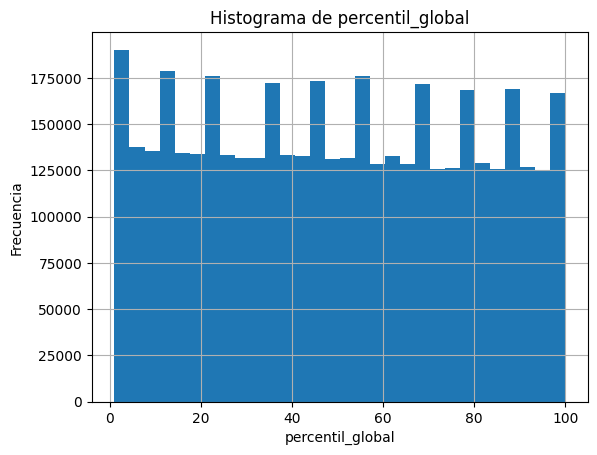

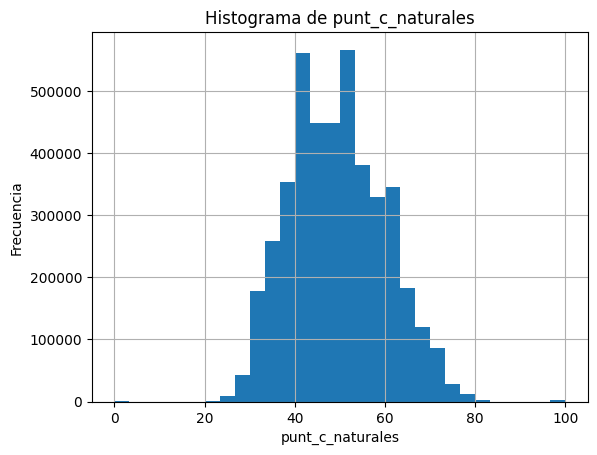

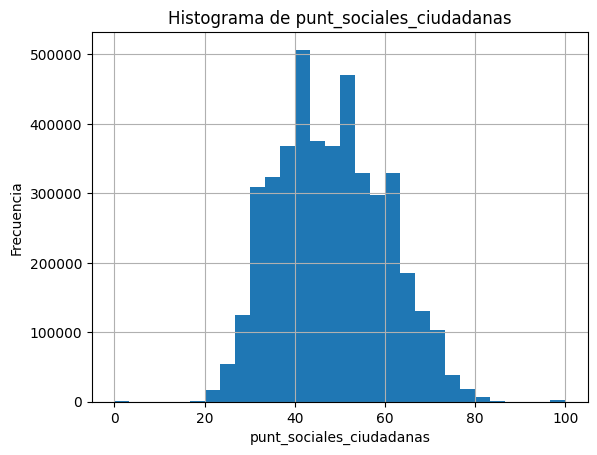

In [ ]:
# Resumen estadístico para variables numéricas
summary = df.describe().transpose()
print("===== Resumen estadístico =====")
print(summary)

# Correlación de numéricas con 'punt_global'
corr_with_global = df[num_cols].corr()['punt_global'] \
                       .drop('punt_global') \
                       .sort_values(ascending=False)
print("\n===== Correlación con punt_global =====")
print(corr_with_global)

# Histogramas de las 3 variables más correlacionadas
top3 = corr_with_global.head(3).index.tolist()
for var in top3:
    plt.figure()
    df[var].hist(bins=30)
    plt.title(f"Histograma de {var}")
    plt.xlabel(var)
    plt.ylabel("Frecuencia")
    plt.show()

In [ ]:
cat_summary = df.describe(include=['object', 'category']).transpose()
print("\n===== Resumen estadístico (categóricas) =====")
print(cat_summary)


===== Resumen estadístico (categóricas) =====
                                  count unique  \
estu_genero                     4357399      2   
estu_nse_individual           4357399.0    8.0   
estu_discapacidad               4357399      2   
estu_dedicacioninternet         4357399      5   
fami_estratovivienda            4357399      7   
fami_educacionmadre             4357399     12   
fami_educacionpadre             4357399     12   
fami_numlibros                  4357399      4   
fami_personashogar              4357399      5   
fami_tieneinternet              4357399      2   
fami_tienecomputador            4357399      2   
fami_tieneconsolavideojuegos    4357399      2   
fami_cuartoshogar               4357399      6   
cole_naturaleza                 4357399      2   
cole_area_ubicacion             4357399      2   
cole_calendario                 4357399      1   
cole_caracter                   4357399      4   
cole_jornada                    4357399      6   
col

In [ ]:
vars_for_plots = [
    'punt_global',
    'punt_matematicas',
    'punt_lectura_critica',
    'cole_cod_mcpio_ubicacion',
    'fami_estratovivienda'
]
df_plot = df.dropna(subset=vars_for_plots)

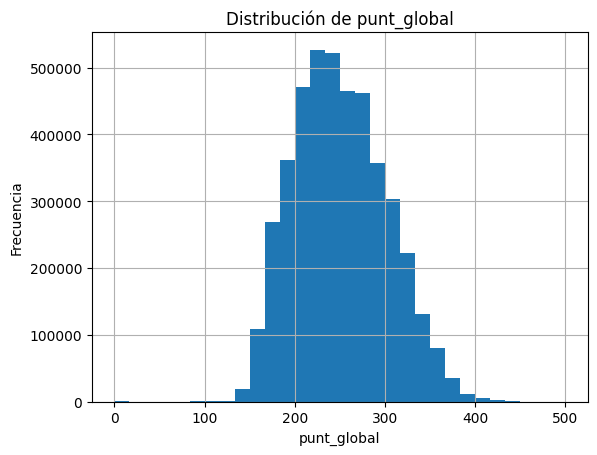

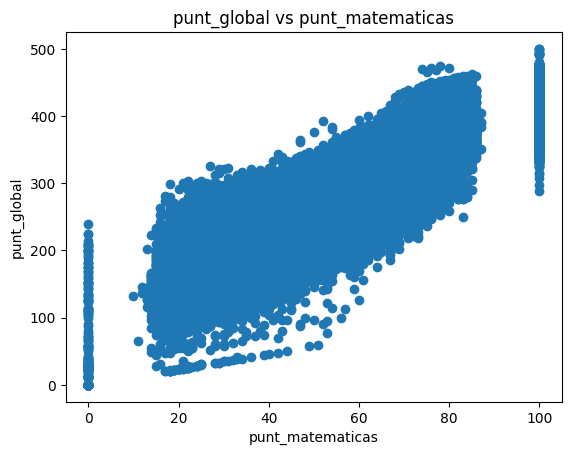

<ipython-input-20-2c9372d4263c>:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_by_stratum = df_plot.groupby('fami_estratovivienda')['punt_global'].mean().sort_index()


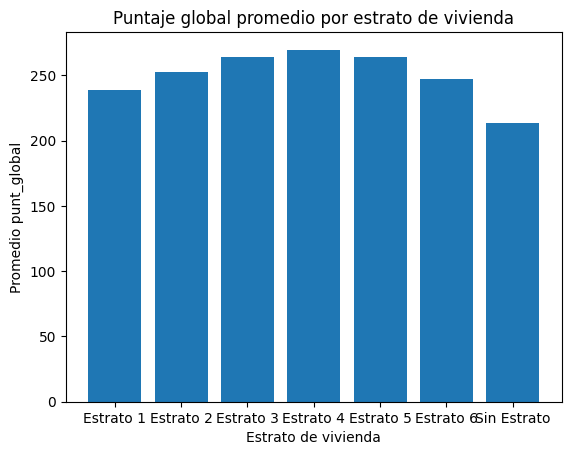

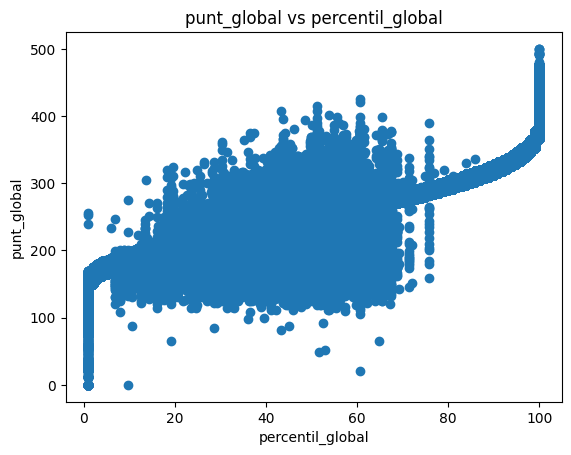

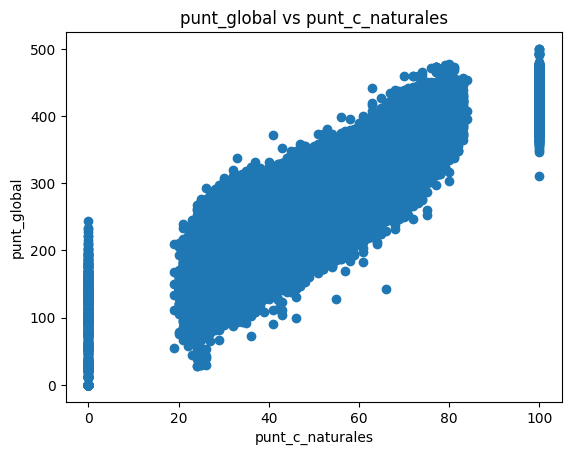

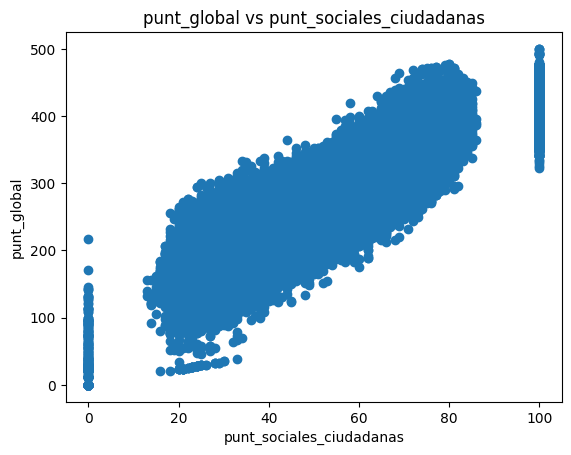

In [ ]:
# 1. Histograma de punt_global
plt.figure()
df_plot['punt_global'].hist(bins=30)
plt.title('Distribución de punt_global')
plt.xlabel('punt_global')
plt.ylabel('Frecuencia')
plt.show()

# 2. Dispersión: punt_global vs punt_matematicas
plt.figure()
plt.scatter(df_plot['punt_matematicas'], df_plot['punt_global'])
plt.title('punt_global vs punt_matematicas')
plt.xlabel('punt_matematicas')
plt.ylabel('punt_global')
plt.show()

# 3. Promedio de punt_global por estrato de vivienda
mean_by_stratum = df_plot.groupby('fami_estratovivienda')['punt_global'].mean().sort_index()
plt.figure()
plt.bar(mean_by_stratum.index.astype(str), mean_by_stratum.values)
plt.title('Puntaje global promedio por estrato de vivienda')
plt.xlabel('Estrato de vivienda')
plt.ylabel('Promedio punt_global')
plt.show()

# 4. Correlaciones con punt_global y gráficos de las top 3 variables
corrs = df_plot.select_dtypes(include='number').corr()['punt_global'] \
               .drop('punt_global') \
               .sort_values(ascending=False)
top3 = corrs.head(3).index.tolist()

for var in top3:
    plt.figure()
    plt.scatter(df_plot[var], df_plot['punt_global'])
    plt.title(f'punt_global vs {var}')
    plt.xlabel(var)
    plt.ylabel('punt_global')
    plt.show()

<ipython-input-21-ab137ff8e979>:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_scores = data.groupby(var)[score].mean().sort_index()


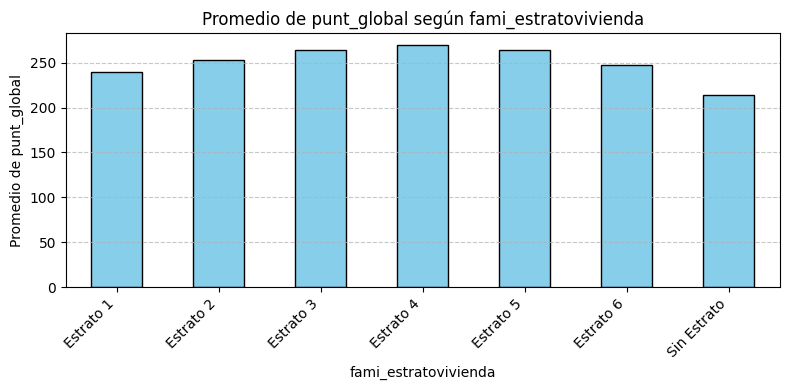

<ipython-input-21-ab137ff8e979>:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_scores = data.groupby(var)[score].mean().sort_index()


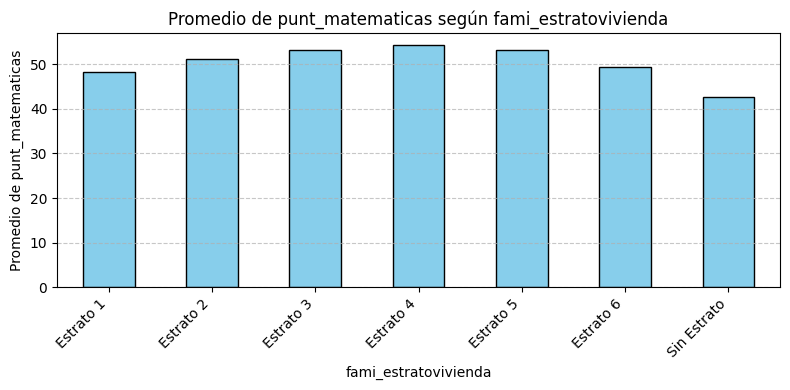

<ipython-input-21-ab137ff8e979>:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_scores = data.groupby(var)[score].mean().sort_index()


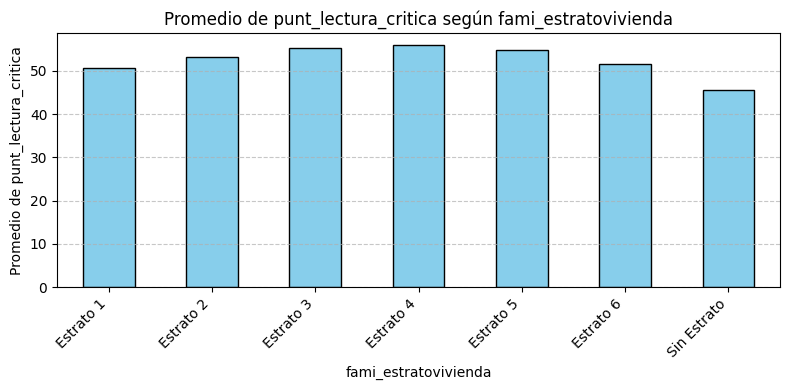

<ipython-input-21-ab137ff8e979>:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_scores = data.groupby(var)[score].mean().sort_index()


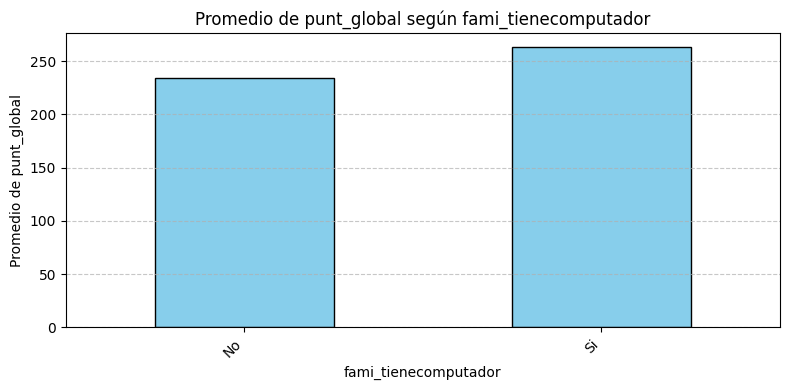

<ipython-input-21-ab137ff8e979>:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_scores = data.groupby(var)[score].mean().sort_index()


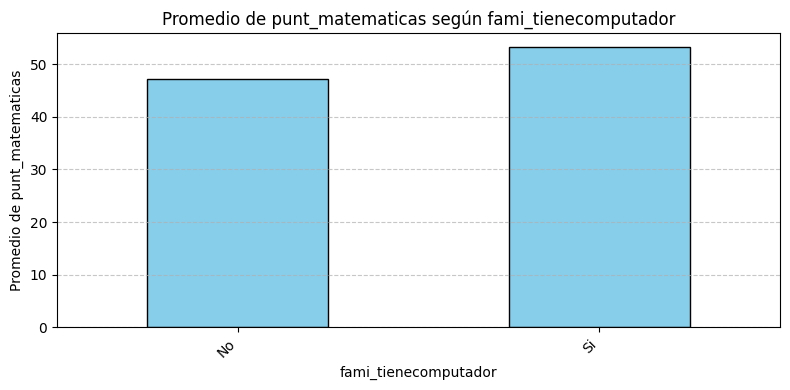

<ipython-input-21-ab137ff8e979>:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_scores = data.groupby(var)[score].mean().sort_index()


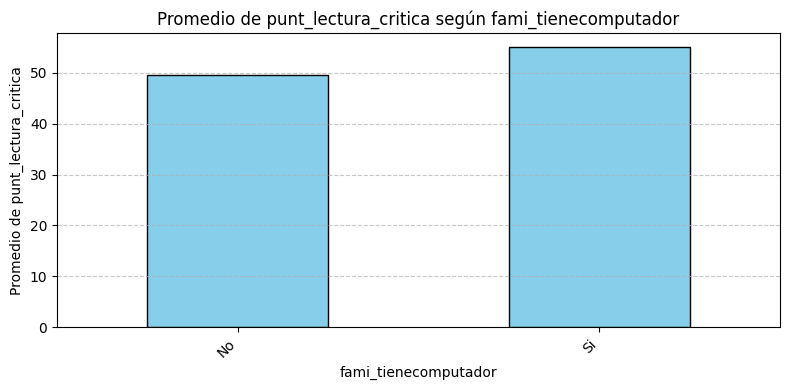

<ipython-input-21-ab137ff8e979>:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_scores = data.groupby(var)[score].mean().sort_index()


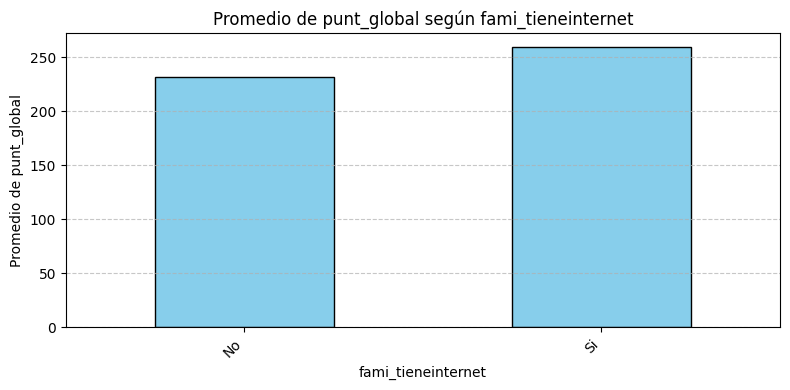

<ipython-input-21-ab137ff8e979>:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_scores = data.groupby(var)[score].mean().sort_index()


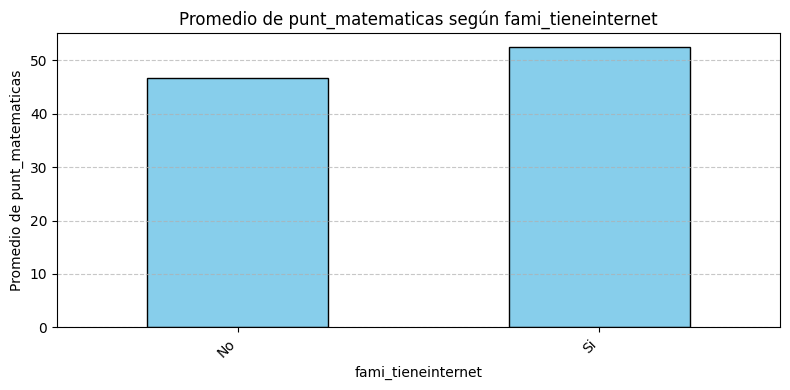

<ipython-input-21-ab137ff8e979>:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_scores = data.groupby(var)[score].mean().sort_index()


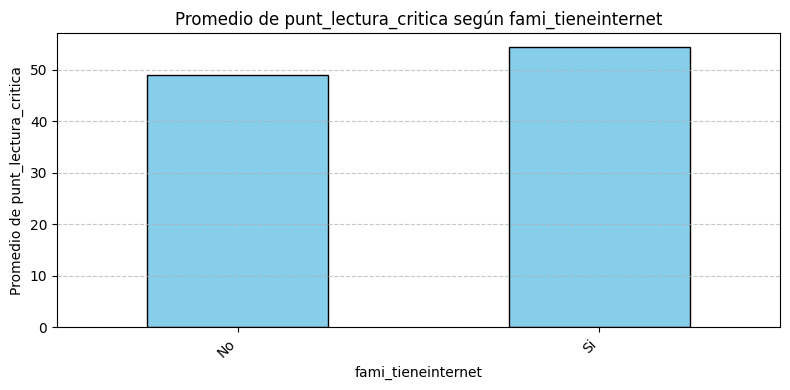

<ipython-input-21-ab137ff8e979>:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_scores = data.groupby(var)[score].mean().sort_index()


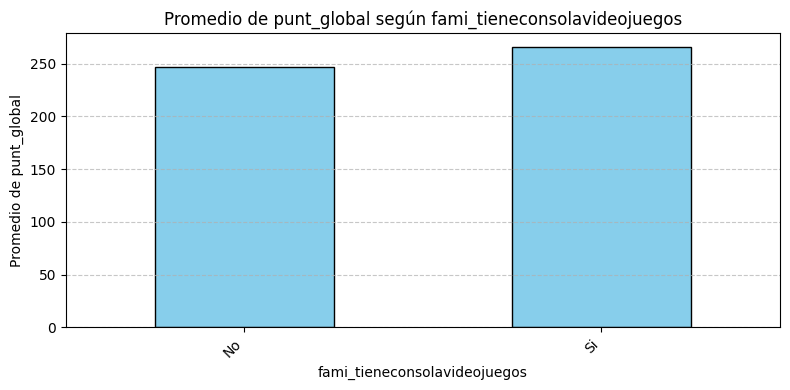

<ipython-input-21-ab137ff8e979>:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_scores = data.groupby(var)[score].mean().sort_index()


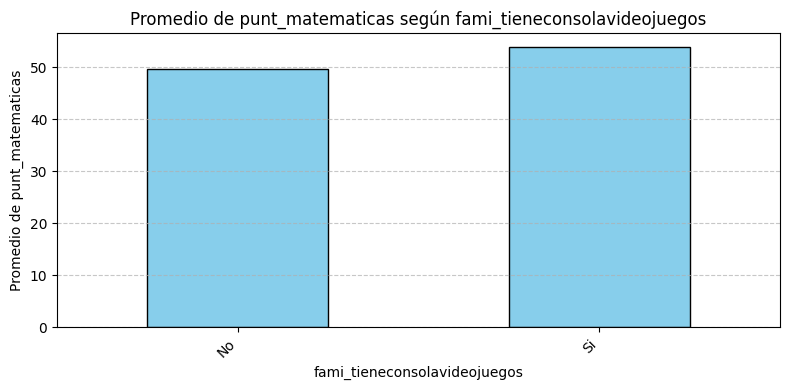

<ipython-input-21-ab137ff8e979>:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_scores = data.groupby(var)[score].mean().sort_index()


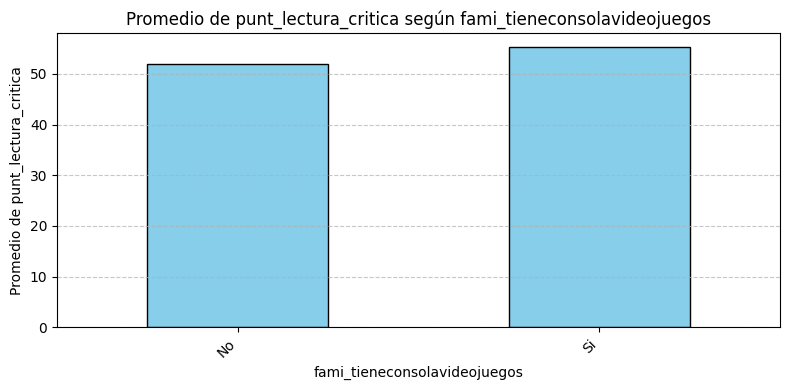

<ipython-input-21-ab137ff8e979>:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_scores = data.groupby(var)[score].mean().sort_index()


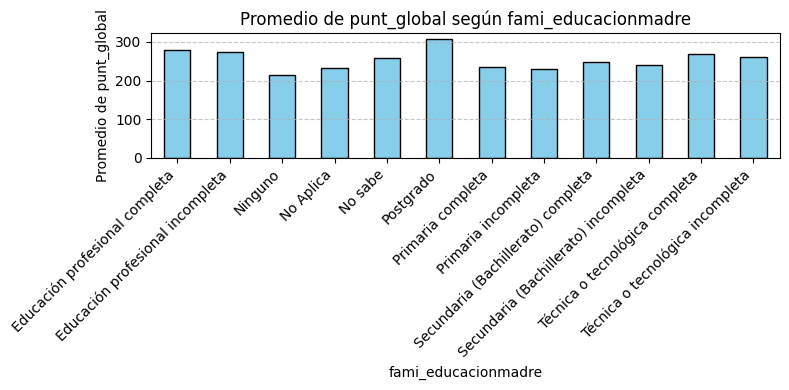

<ipython-input-21-ab137ff8e979>:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_scores = data.groupby(var)[score].mean().sort_index()


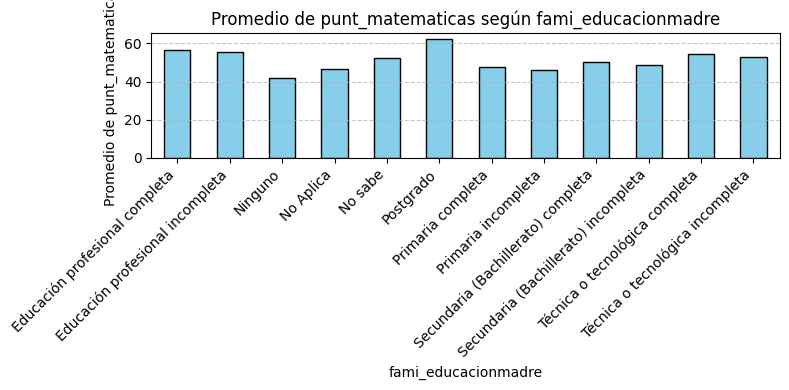

<ipython-input-21-ab137ff8e979>:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_scores = data.groupby(var)[score].mean().sort_index()


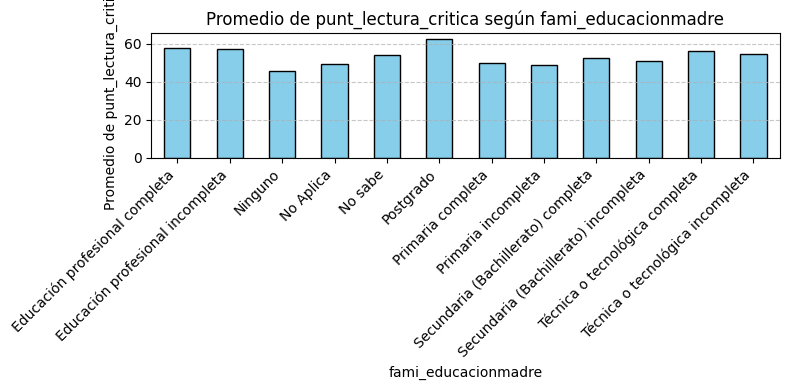

<ipython-input-21-ab137ff8e979>:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_scores = data.groupby(var)[score].mean().sort_index()


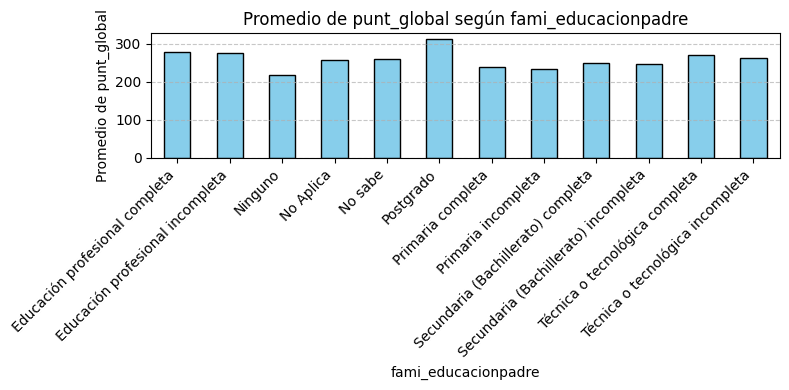

<ipython-input-21-ab137ff8e979>:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_scores = data.groupby(var)[score].mean().sort_index()


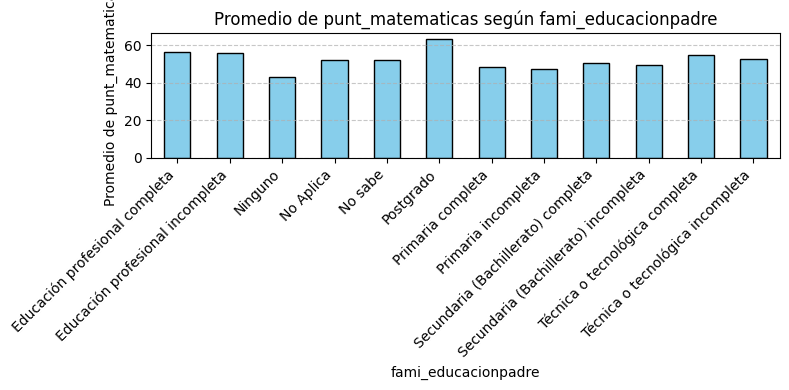

<ipython-input-21-ab137ff8e979>:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_scores = data.groupby(var)[score].mean().sort_index()


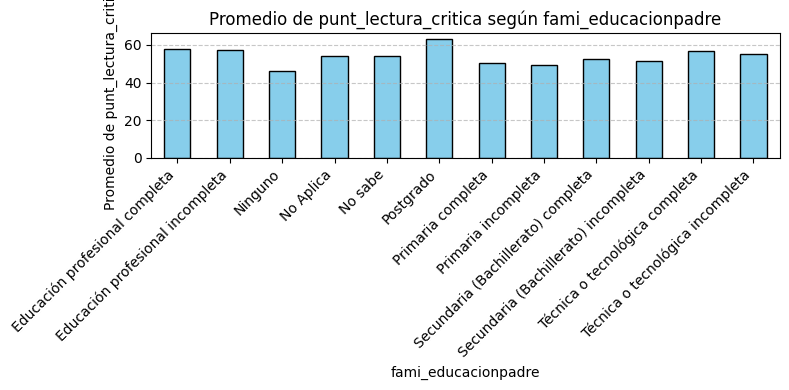

<ipython-input-21-ab137ff8e979>:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_scores = data.groupby(var)[score].mean().sort_index()


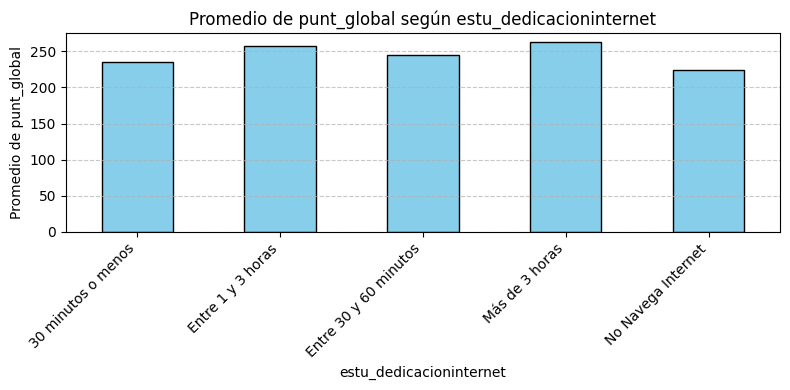

<ipython-input-21-ab137ff8e979>:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_scores = data.groupby(var)[score].mean().sort_index()


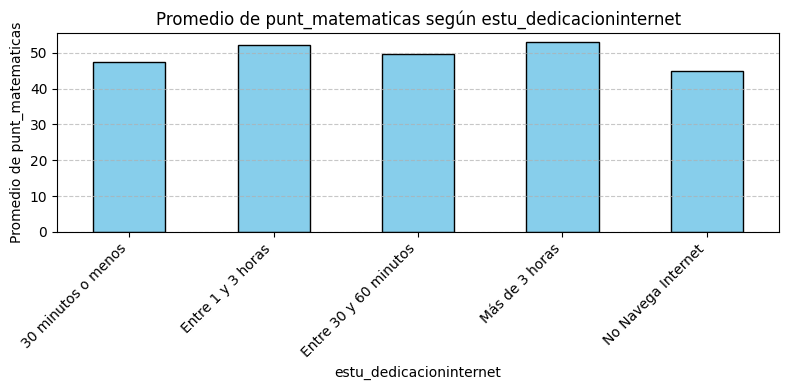

<ipython-input-21-ab137ff8e979>:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_scores = data.groupby(var)[score].mean().sort_index()


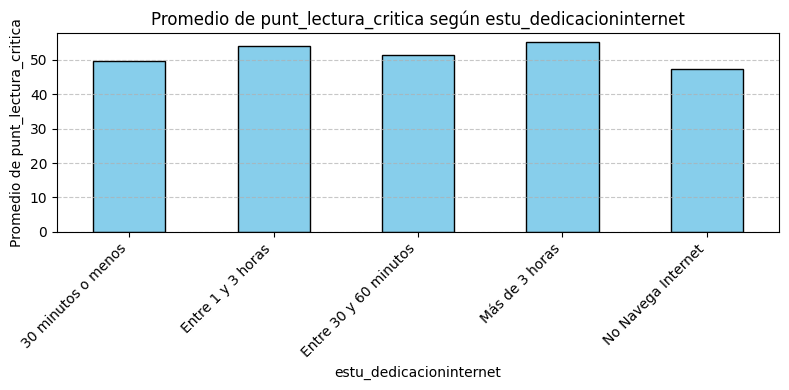

<ipython-input-21-ab137ff8e979>:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_scores = data.groupby(var)[score].mean().sort_index()


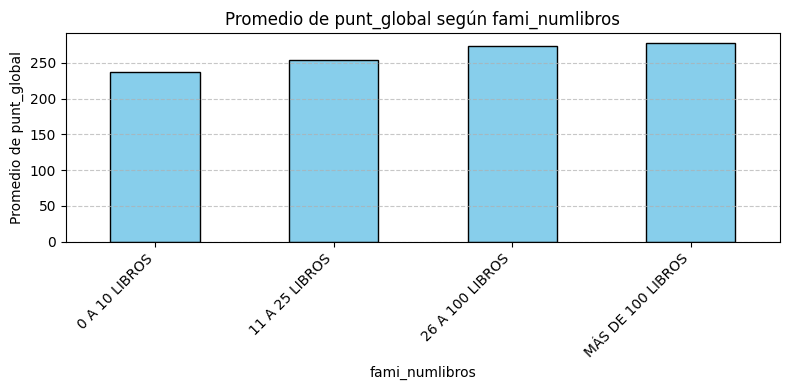

<ipython-input-21-ab137ff8e979>:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_scores = data.groupby(var)[score].mean().sort_index()


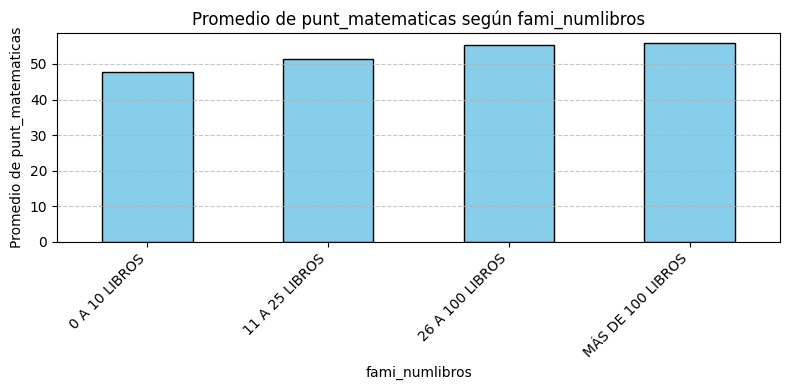

<ipython-input-21-ab137ff8e979>:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_scores = data.groupby(var)[score].mean().sort_index()


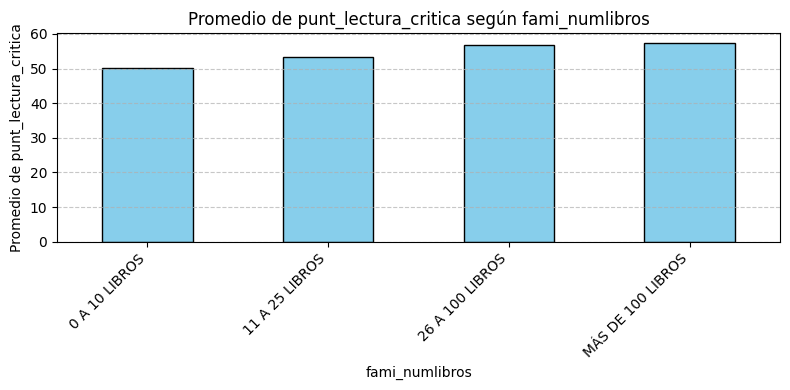

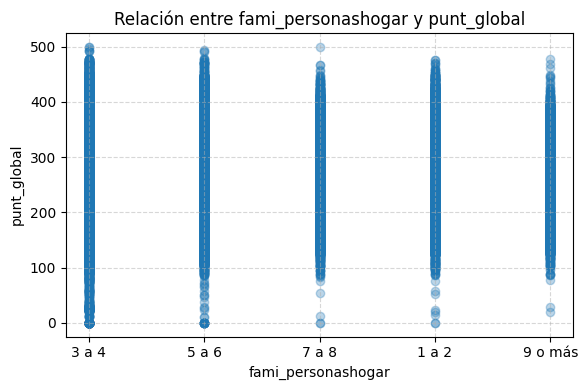

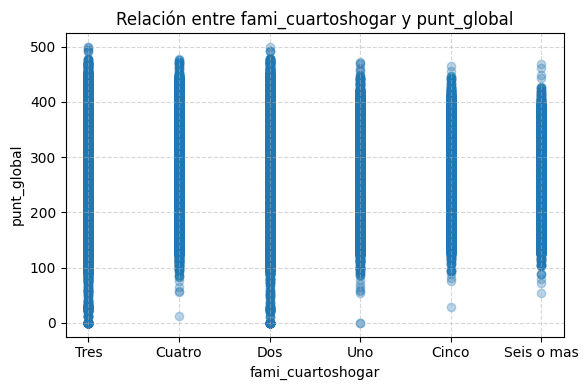

In [ ]:
# Variables categóricas a analizar
cat_vars = [
    'fami_estratovivienda', 'fami_tienecomputador', 'fami_tieneinternet',
    'fami_tieneconsolavideojuegos', 'fami_educacionmadre', 'fami_educacionpadre',
    'estu_dedicacioninternet', 'fami_numlibros'
]

# Variables numéricas
num_vars = ['fami_personashogar', 'fami_cuartoshogar']

# Puntajes a evaluar
score_vars = ['punt_global', 'punt_matematicas', 'punt_lectura_critica']

# Visualización de puntajes promedios por categoría
for var in cat_vars:
    for score in score_vars:
        data = df.dropna(subset=[var, score])
        mean_scores = data.groupby(var)[score].mean().sort_index()
        plt.figure(figsize=(8, 4))
        mean_scores.plot(kind='bar', color='skyblue', edgecolor='black')
        plt.title(f'Promedio de {score} según {var}')
        plt.xlabel(var)
        plt.ylabel(f'Promedio de {score}')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

# Visualización de relaciones con variables numéricas
for var in num_vars:
    data = df.dropna(subset=[var, 'punt_global'])
    plt.figure(figsize=(6, 4))
    plt.scatter(data[var], data['punt_global'], alpha=0.3)
    plt.title(f'Relación entre {var} y punt_global')
    plt.xlabel(var)
    plt.ylabel('punt_global')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


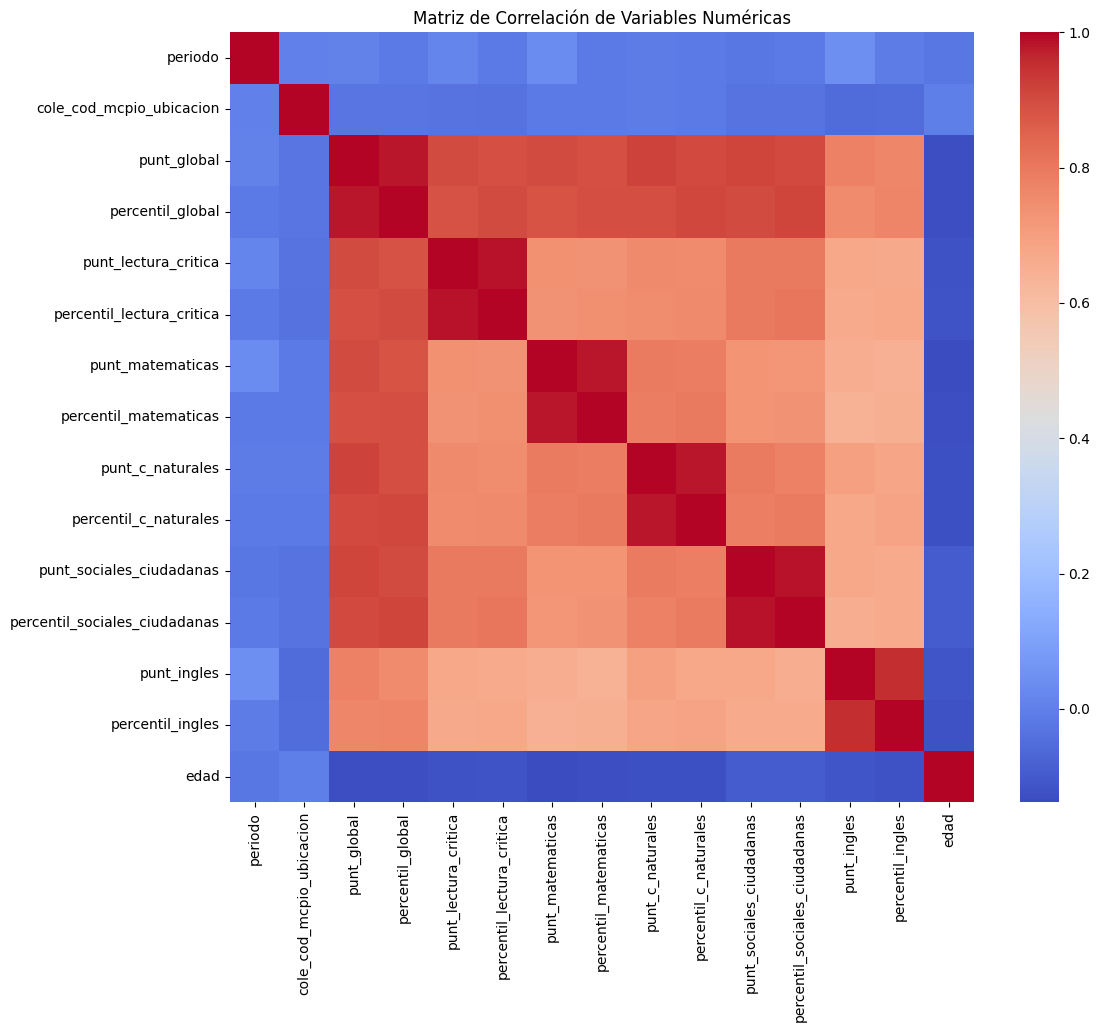

In [ ]:
# Selecciona solo las columnas numéricas
df_numeric = df.select_dtypes(include=np.number)

# Calcula la matriz de correlación
correlation_matrix = df_numeric.corr()

# Crea un heatmap de la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm') # annot=True si quieres ver los valores
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()


===== Estadística Descriptiva de 'punt_global' por Variable Categórica =====

--- estu_genero ---


<ipython-input-23-018f205420ba>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby(var)[target].describe())


                 count        mean        std  min    25%    50%    75%    max
estu_genero                                                                   
F            2358915.0  246.727394  49.421241  0.0  209.0  243.0  281.0  500.0
M            1998484.0  254.643345  52.128210  0.0  215.0  252.0  292.0  500.0


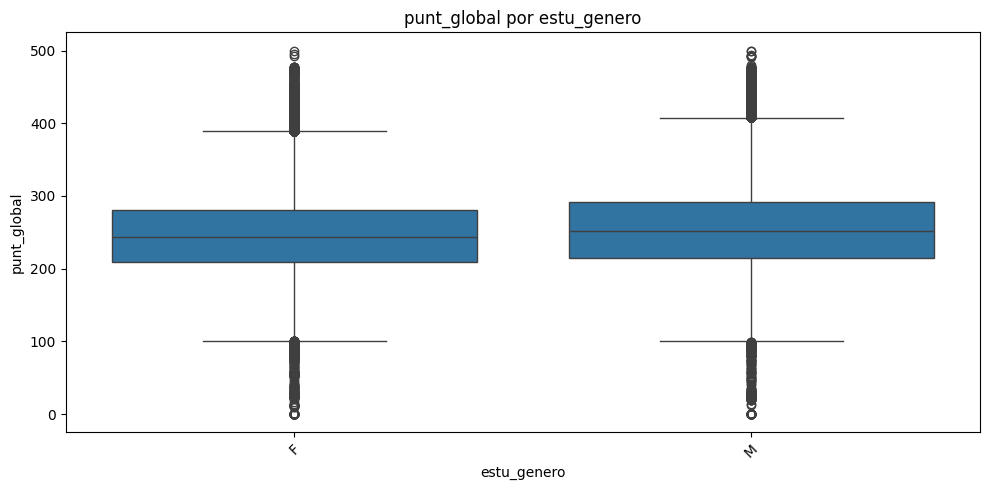

Variable 'estu_etnia' no encontrada en el DataFrame.

--- estu_discapacidad ---


<ipython-input-23-018f205420ba>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby(var)[target].describe())


                       count        mean        std  min    25%    50%    75%  \
estu_discapacidad                                                               
N                  4315329.0  250.580051  50.778051  0.0  212.0  247.0  286.0   
S                    42070.0  227.578797  51.411394  0.0  188.0  224.0  264.0   

                     max  
estu_discapacidad         
N                  500.0  
S                  463.0  


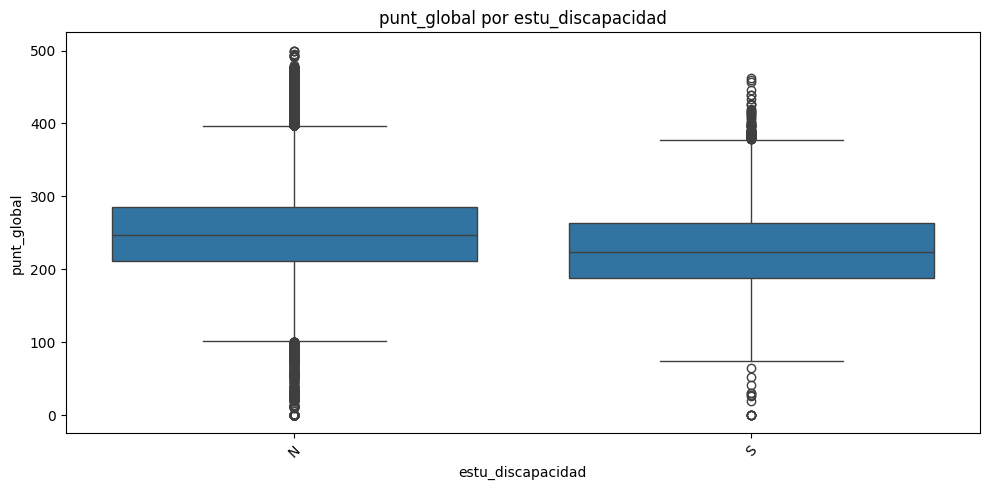


--- estu_dedicacioninternet ---


<ipython-input-23-018f205420ba>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby(var)[target].describe())


                             count        mean        std  min    25%    50%  \
estu_dedicacioninternet                                                        
30 minutos o menos        653470.0  234.887794  46.668967  0.0  199.0  230.0   
Entre 1 y 3 horas        1470879.0  257.739901  51.380488  0.0  219.0  256.0   
Entre 30 y 60 minutos    1081944.0  244.746694  48.544438  0.0  208.0  241.0   
Más de 3 horas            924364.0  262.522889  50.456415  0.0  225.0  262.0   
No Navega Internet        226742.0  224.238747  46.419547  0.0  188.0  218.0   

                           75%    max  
estu_dedicacioninternet                
30 minutos o menos       266.0  500.0  
Entre 1 y 3 horas        294.0  500.0  
Entre 30 y 60 minutos    278.0  494.0  
Más de 3 horas           299.0  500.0  
No Navega Internet       254.0  480.0  


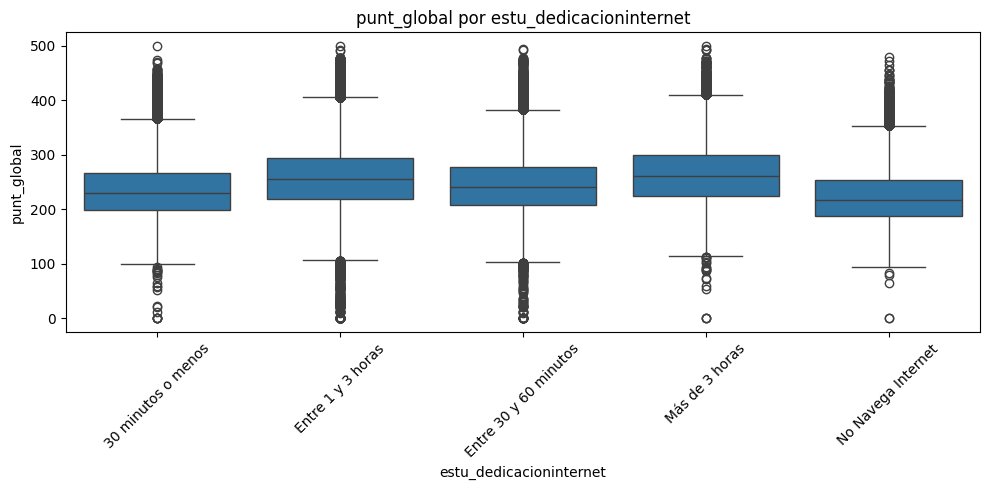


--- fami_estratovivienda ---


<ipython-input-23-018f205420ba>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby(var)[target].describe())


                          count        mean        std   min    25%    50%  \
fami_estratovivienda                                                         
Estrato 1             1381741.0  239.015344  46.087430   0.0  204.0  235.0   
Estrato 2             1598937.0  252.781921  48.019608   0.0  217.0  251.0   
Estrato 3              906705.0  263.921004  51.616860   0.0  225.0  264.0   
Estrato 4              220126.0  269.606662  61.769433   0.0  218.0  272.0   
Estrato 5               66680.0  264.349010  66.958773  55.0  205.0  263.0   
Estrato 6               30986.0  247.346253  69.076917  72.0  187.0  235.0   
Sin Estrato            152224.0  213.717561  43.075671   0.0  182.0  206.0   

                        75%    max  
fami_estratovivienda                
Estrato 1             270.0  500.0  
Estrato 2             287.0  500.0  
Estrato 3             302.0  476.0  
Estrato 4             319.0  495.0  
Estrato 5             320.0  500.0  
Estrato 6             305.0  476.0  
S

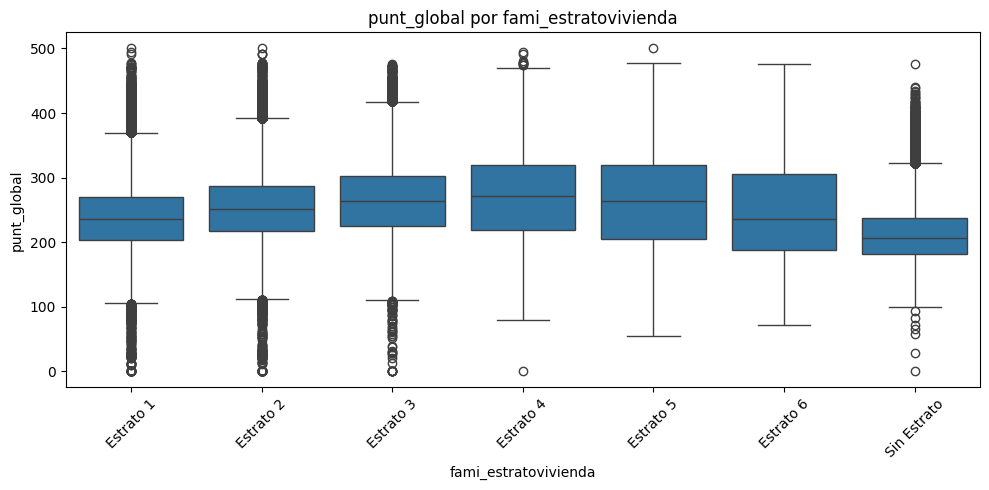


--- fami_educacionmadre ---


<ipython-input-23-018f205420ba>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby(var)[target].describe())


                                          count        mean        std    min  \
fami_educacionmadre                                                             
Educación profesional completa         475272.0  278.729753  53.440604   55.0   
Educación profesional incompleta       111221.0  273.979842  51.349240  112.0   
Ninguno                                 91557.0  213.148279  41.273419    0.0   
No Aplica                                8866.0  232.821002  55.722855   89.0   
No sabe                                 92000.0  258.169826  54.832176   27.0   
Postgrado                               89825.0  308.093649  53.188298  118.0   
Primaria completa                      385493.0  235.313017  44.374258    0.0   
Primaria incompleta                    602294.0  229.425716  42.404692    0.0   
Secundaria (Bachillerato) completa    1358525.0  247.427352  48.350869    0.0   
Secundaria (Bachillerato) incompleta   586066.0  241.237309  44.897659   14.0   
Técnica o tecnológica comple

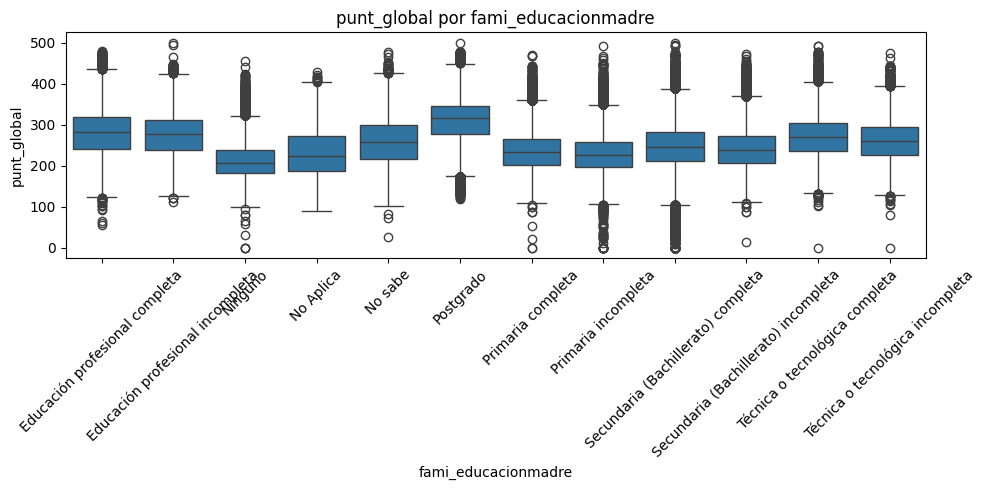


--- fami_educacionpadre ---


<ipython-input-23-018f205420ba>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby(var)[target].describe())


                                          count        mean        std    min  \
fami_educacionpadre                                                             
Educación profesional completa         388506.0  278.818729  54.082667   60.0   
Educación profesional incompleta        85866.0  276.284408  52.853498    0.0   
Ninguno                                147992.0  216.486033  42.265797    0.0   
No Aplica                               54231.0  256.947041  50.920165   73.0   
No sabe                                279477.0  258.721666  49.917859   27.0   
Postgrado                               74382.0  312.464346  53.176291  119.0   
Primaria completa                      390899.0  239.153664  45.254764   53.0   
Primaria incompleta                    806930.0  233.515226  43.644625    0.0   
Secundaria (Bachillerato) completa    1178759.0  249.326173  49.026135    0.0   
Secundaria (Bachillerato) incompleta   583767.0  245.054201  46.436660   72.0   
Técnica o tecnológica comple

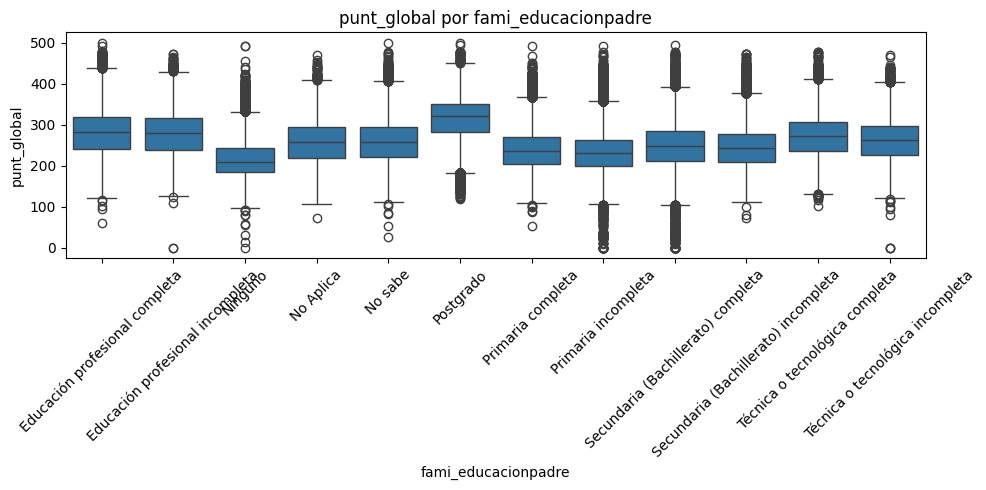


--- fami_tieneinternet ---


<ipython-input-23-018f205420ba>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby(var)[target].describe())


                        count        mean        std  min    25%    50%  \
fami_tieneinternet                                                        
No                  1416597.0  231.228566  44.303038  0.0  197.0  227.0   
Si                  2940802.0  259.572698  51.207521  0.0  221.0  258.0   

                      75%    max  
fami_tieneinternet                
No                  261.0  500.0  
Si                  296.0  500.0  


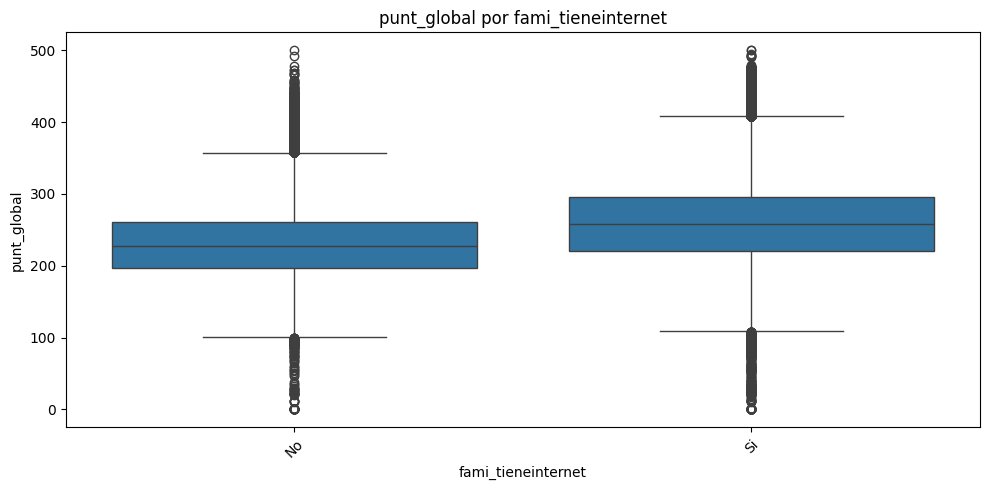


--- fami_tienecomputador ---


<ipython-input-23-018f205420ba>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby(var)[target].describe())


                          count        mean        std  min    25%    50%  \
fami_tienecomputador                                                        
No                    1923037.0  233.929926  44.942908  0.0  200.0  230.0   
Si                    2434362.0  263.335403  51.460684  0.0  225.0  263.0   

                        75%    max  
fami_tienecomputador                
No                    264.0  494.0  
Si                    300.0  500.0  


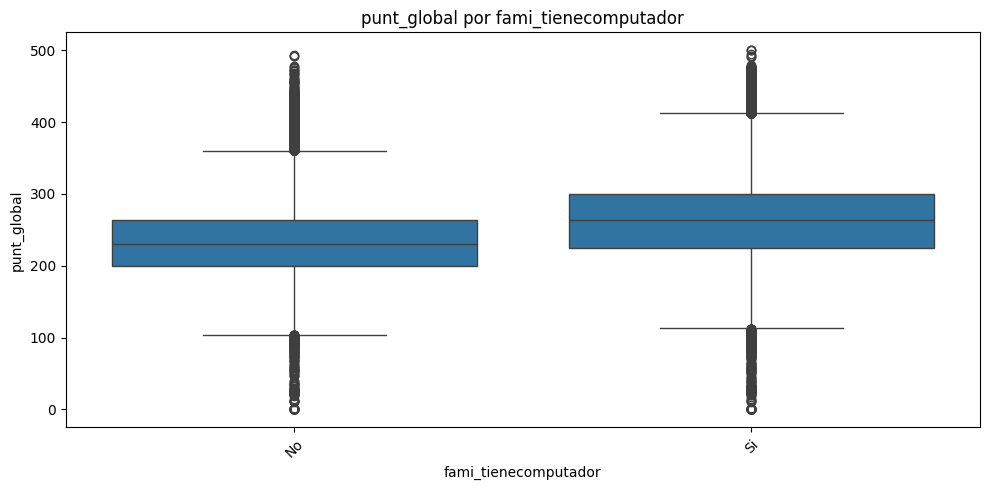


--- fami_tieneconsolavideojuegos ---


<ipython-input-23-018f205420ba>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby(var)[target].describe())


                                  count        mean        std  min    25%  \
fami_tieneconsolavideojuegos                                                 
No                            3514517.0  246.607320  49.318326  0.0  209.0   
Si                             842882.0  265.996881  53.979632  0.0  225.0   

                                50%    75%    max  
fami_tieneconsolavideojuegos                       
No                            243.0  281.0  500.0  
Si                            266.0  305.0  492.0  


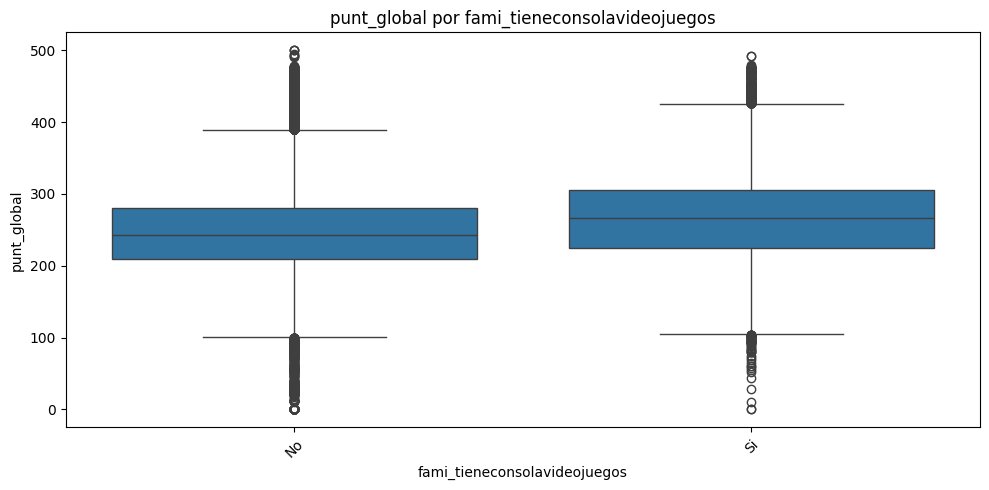


--- cole_naturaleza ---


<ipython-input-23-018f205420ba>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby(var)[target].describe())


                     count        mean        std  min    25%    50%    75%  \
cole_naturaleza                                                               
NO OFICIAL        986691.0  270.725399  56.375633  0.0  227.0  272.0  313.0   
OFICIAL          3370708.0  244.395921  47.467915  0.0  208.0  242.0  278.0   

                   max  
cole_naturaleza         
NO OFICIAL       500.0  
OFICIAL          500.0  


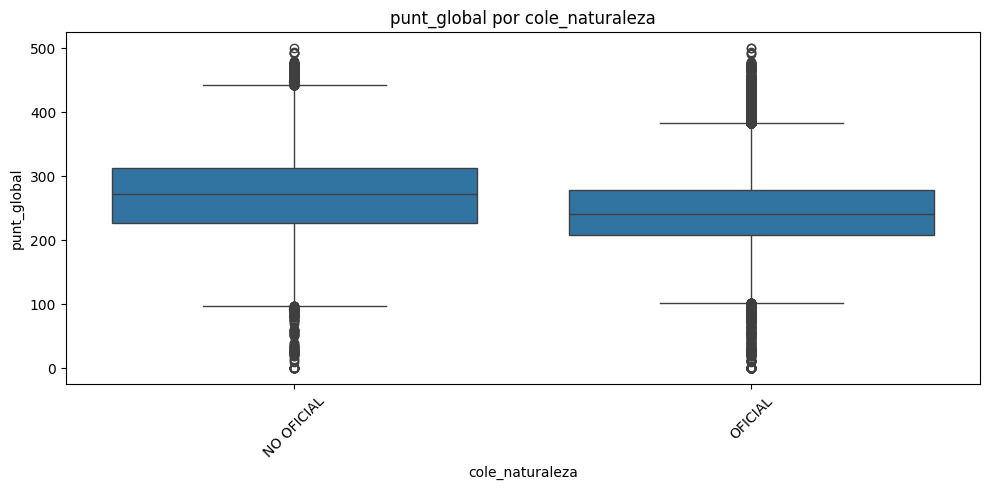


--- cole_area_ubicacion ---


<ipython-input-23-018f205420ba>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby(var)[target].describe())


                         count        mean        std  min    25%    50%  \
cole_area_ubicacion                                                        
RURAL                 717140.0  229.581298  46.505610  0.0  194.0  223.0   
URBANO               3640259.0  254.451035  50.648811  0.0  216.0  252.0   

                       75%    max  
cole_area_ubicacion                
RURAL                259.0  500.0  
URBANO               290.0  500.0  


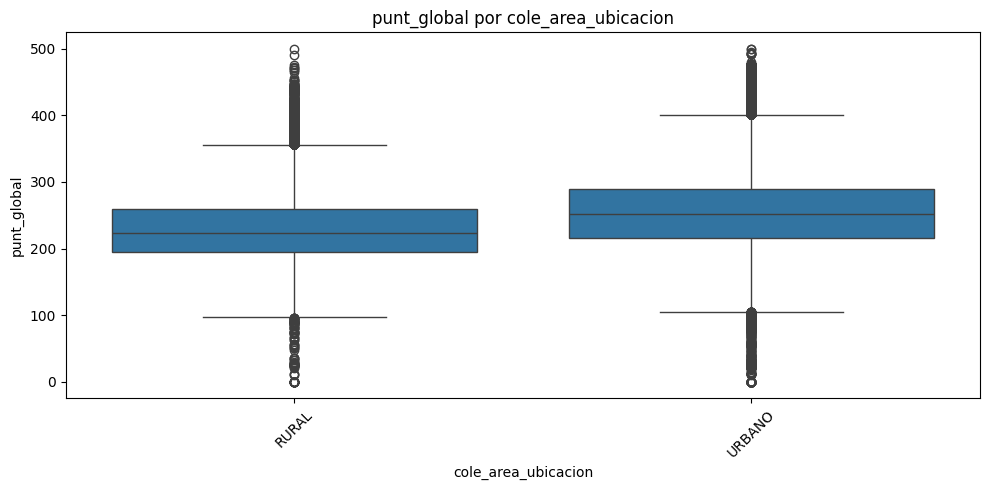


--- cole_calendario ---


<ipython-input-23-018f205420ba>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby(var)[target].describe())


                     count        mean        std  min    25%    50%    75%  \
cole_calendario                                                               
A                4357399.0  250.357978  50.833979  0.0  212.0  247.0  286.0   
B                      0.0         NaN        NaN  NaN    NaN    NaN    NaN   
OTRO                   0.0         NaN        NaN  NaN    NaN    NaN    NaN   

                   max  
cole_calendario         
A                500.0  
B                  NaN  
OTRO               NaN  


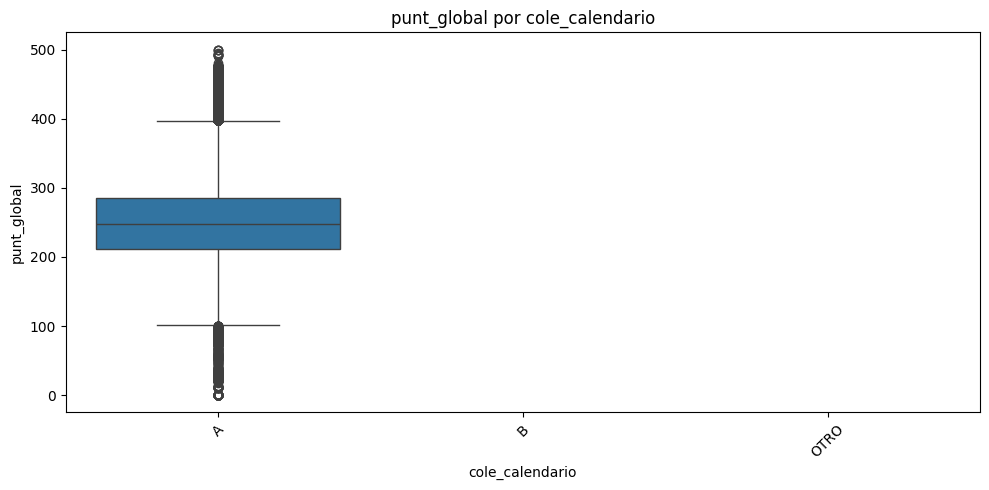


--- cole_caracter ---


<ipython-input-23-018f205420ba>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby(var)[target].describe())


                       count        mean        std  min    25%    50%    75%  \
cole_caracter                                                                   
ACADÉMICO          2314240.0  253.081568  52.534946  0.0  213.0  250.0  290.0   
NO APLICA            61502.0  235.421059  52.525381  0.0  193.0  228.0  272.0   
TÉCNICO             480701.0  243.890847  48.545501  0.0  207.0  240.0  278.0   
TÉCNICO/ACADÉMICO  1500956.0  248.841853  48.398360  0.0  212.0  247.0  283.0   

                     max  
cole_caracter             
ACADÉMICO          500.0  
NO APLICA          469.0  
TÉCNICO            492.0  
TÉCNICO/ACADÉMICO  500.0  


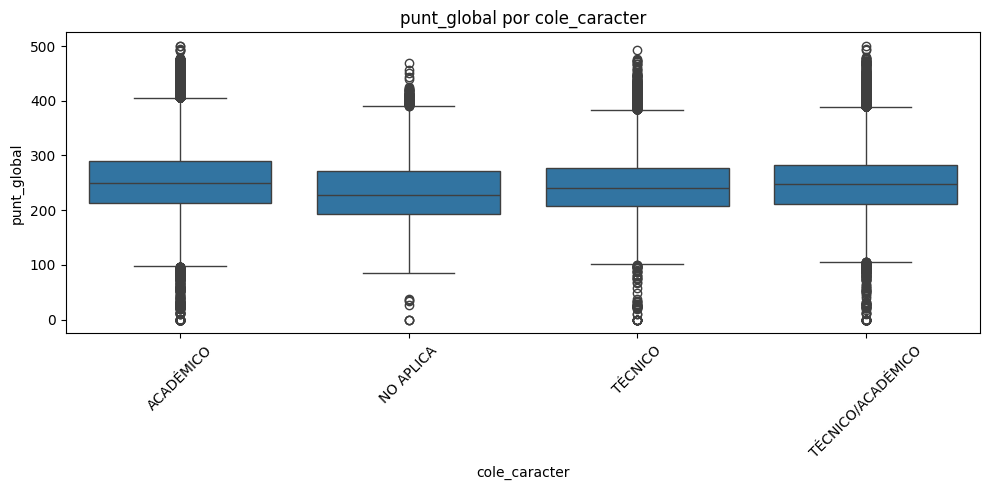


--- cole_jornada ---


<ipython-input-23-018f205420ba>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby(var)[target].describe())


                  count        mean        std  min    25%    50%    75%  \
cole_jornada                                                               
COMPLETA       680131.0  278.310699  53.334505  0.0  239.0  280.0  318.0   
MAÑANA        1873619.0  249.638454  48.750391  0.0  213.0  247.0  284.0   
NOCHE          210403.0  210.316146  38.442221  0.0  182.0  205.0  234.0   
SABATINA       246367.0  211.293116  37.654819  0.0  183.0  207.0  235.0   
TARDE          447020.0  247.417684  46.273346  0.0  213.0  245.0  280.0   
UNICA          899859.0  252.247370  47.170025  0.0  217.0  250.0  285.0   

                max  
cole_jornada         
COMPLETA      500.0  
MAÑANA        500.0  
NOCHE         410.0  
SABATINA      437.0  
TARDE         473.0  
UNICA         500.0  


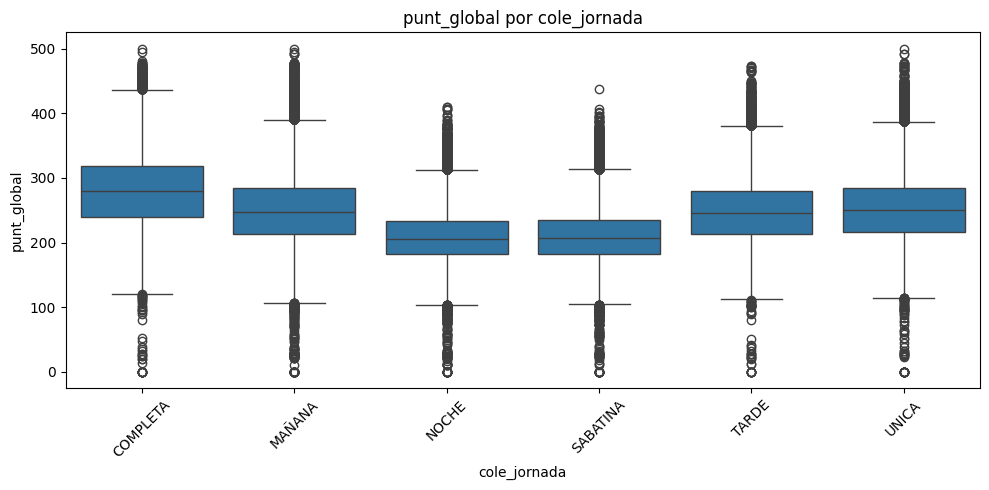


--- cole_bilingue ---


<ipython-input-23-018f205420ba>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby(var)[target].describe())


                   count        mean        std  min    25%    50%    75%  \
cole_bilingue                                                               
N              4308344.0  250.438071  50.760615  0.0  212.0  247.0  286.0   
S                49055.0  243.323637  56.468748  0.0  199.0  236.0  281.0   

                 max  
cole_bilingue         
N              500.0  
S              472.0  


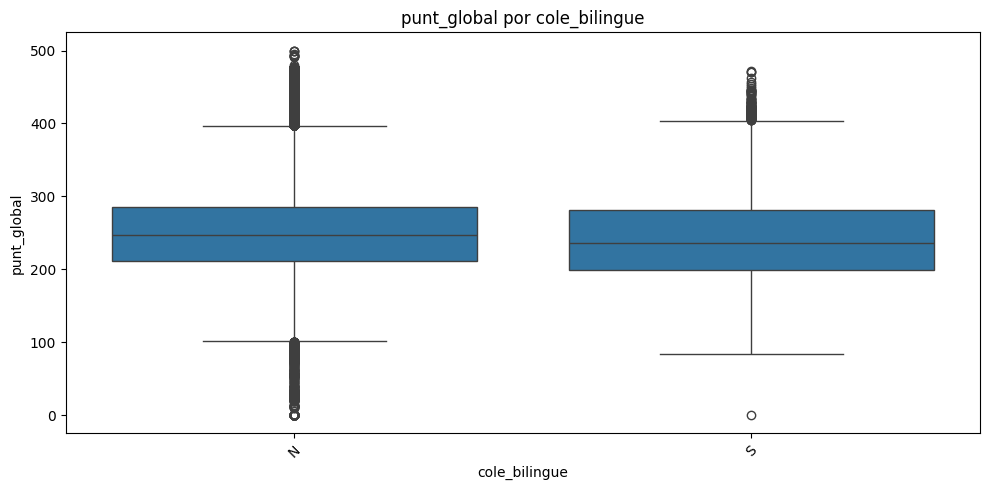


--- fami_numlibros ---


<ipython-input-23-018f205420ba>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby(var)[target].describe())


                       count        mean        std   min    25%    50%  \
fami_numlibros                                                            
0 A 10 LIBROS      2077750.0  236.792637  46.329846   0.0  202.0  233.0   
11 A 25 LIBROS     1286501.0  253.687389  49.038892   0.0  217.0  252.0   
26 A 100 LIBROS     770130.0  273.447280  50.837696  58.0  237.0  275.0   
MÁS DE 100 LIBROS   223018.0  277.801195  57.635367   0.0  237.0  282.0   

                     75%    max  
fami_numlibros                   
0 A 10 LIBROS      268.0  500.0  
11 A 25 LIBROS     288.0  495.0  
26 A 100 LIBROS    310.0  500.0  
MÁS DE 100 LIBROS  321.0  500.0  


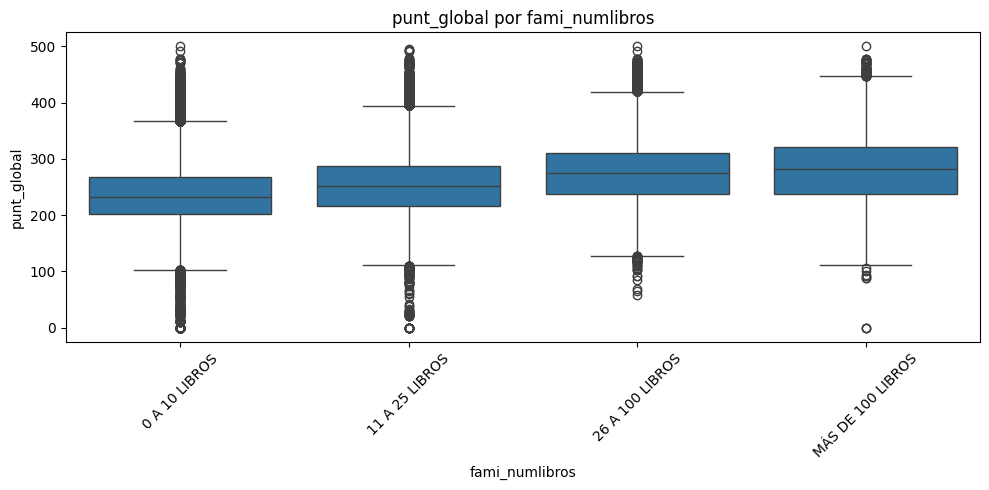

In [ ]:
# Lista de variables categóricas a analizar
cat_vars = [
    'estu_genero', 'estu_etnia', 'estu_discapacidad', 'estu_dedicacioninternet',
    'fami_estratovivienda', 'fami_educacionmadre', 'fami_educacionpadre',
    'fami_tieneinternet', 'fami_tienecomputador', 'fami_tieneconsolavideojuegos',
    'cole_naturaleza', 'cole_area_ubicacion', 'cole_calendario',
    'cole_caracter', 'cole_jornada', 'cole_bilingue', 'fami_numlibros'
]

# Variable objetivo
target = 'punt_global'

print(f"\n===== Estadística Descriptiva de '{target}' por Variable Categórica =====")
for var in cat_vars:
    if var in df.columns:
        print(f"\n--- {var} ---")
        print(df.groupby(var)[target].describe())

        # Visualizar si el número de categorías es razonable
        if df[var].nunique() < 15:
            plt.figure(figsize=(10, 5))
            sns.boxplot(x=var, y=target, data=df)
            plt.title(f'{target} por {var}')
            plt.xlabel(var)
            plt.ylabel(target)
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()
        else:
            print(f"Variable '{var}' tiene muchas categorías. Se omite boxplot.")
    else:
        print(f"Variable '{var}' no encontrada en el DataFrame.")



Correlación Pearson entre tener internet y tener computador: 0.4960


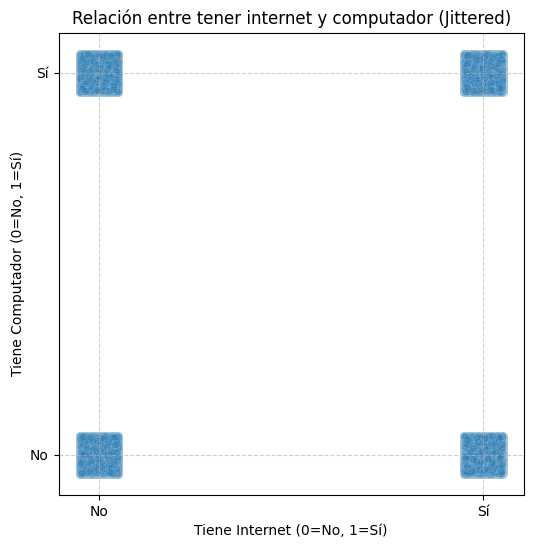


Tabla de Contingencia:
 fami_tienecomputador       No       Si
fami_tieneinternet                    
No                    1127883   288714
Si                     795154  2145648


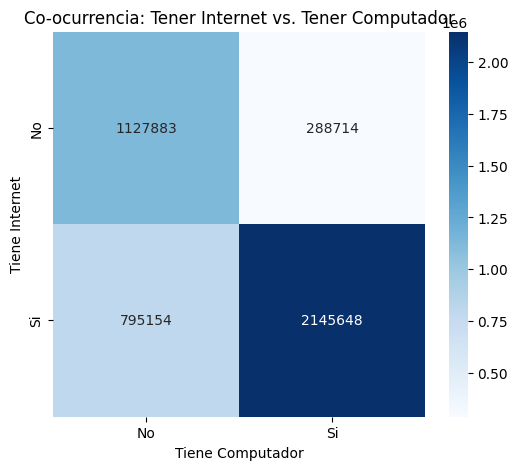

In [ ]:
# Convertir las variables categóricas a binarias numéricas
df['tiene_internet'] = df['fami_tieneinternet'].apply(lambda x: 1 if x == 'Si' else 0).astype(int)
df['tiene_computador'] = df['fami_tienecomputador'].apply(lambda x: 1 if x == 'Si' else 0).astype(int)

# Calcular la correlación de Pearson
correlacion = df['tiene_internet'].corr(df['tiene_computador'])
print(f"\nCorrelación Pearson entre tener internet y tener computador: {correlacion:.4f}")

# Visualización: dispersión con jitter
plt.figure(figsize=(6, 6))
sns.scatterplot(
    x=df['tiene_internet'] + np.random.uniform(-0.05, 0.05, size=len(df)),
    y=df['tiene_computador'] + np.random.uniform(-0.05, 0.05, size=len(df)),
    alpha=0.1
)
plt.title('Relación entre tener internet y computador (Jittered)')
plt.xlabel('Tiene Internet (0=No, 1=Sí)')
plt.ylabel('Tiene Computador (0=No, 1=Sí)')
plt.xticks([0, 1], ['No', 'Sí'])
plt.yticks([0, 1], ['No', 'Sí'])
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Tabla de contingencia
tabla = pd.crosstab(df['fami_tieneinternet'], df['fami_tienecomputador'])
print("\nTabla de Contingencia:\n", tabla)

# Heatmap de co-ocurrencia
plt.figure(figsize=(6, 5))
sns.heatmap(tabla, annot=True, fmt='d', cmap='Blues')
plt.title('Co-ocurrencia: Tener Internet vs. Tener Computador')
plt.xlabel('Tiene Computador')
plt.ylabel('Tiene Internet')
plt.show()

In [ ]:
from scipy import stats

# Variable objetivo
score_var = 'punt_global'

# Lista de variables categóricas que quieres evaluar
categorical_vars_of_interest = [
    'estu_genero', 'estu_etnia', 'estu_discapacidad', 'estu_dedicacioninternet',
    'fami_estratovivienda', 'fami_educacionmadre', 'fami_educacionpadre',
    'fami_numlibros', 'fami_tieneinternet', 'fami_tienecomputador',
    'fami_tieneconsolavideojuegos', 'cole_naturaleza', 'cole_area_ubicacion',
    'cole_caracter', 'cole_jornada', 'cole_bilingue'
]

print(f"\n===== ANOVA unidireccional: Relación entre categóricas y {score_var} =====")

for cat_var in categorical_vars_of_interest:
    if cat_var in df.columns and score_var in df.columns:
        data_anova = df[[cat_var, score_var]].dropna()
        groups = data_anova.groupby(cat_var)[score_var].apply(list)

        if len(groups) > 1:
            try:
                f_stat, p_val = stats.f_oneway(*groups)
                print(f"\n{cat_var}: F = {f_stat:.2f}, p = {p_val:.4f}")
                if p_val < 0.05:
                    print("→ Diferencias significativas entre grupos.")
                else:
                    print("→ No hay diferencias significativas.")
            except ValueError as e:
                print(f"\n{cat_var}: Error en ANOVA - {e}")
        else:
            print(f"\n{cat_var}: Solo una categoría con datos válidos.")
    else:
        print(f"\n{cat_var}: Variable no encontrada en el DataFrame.")



===== ANOVA unidireccional: Relación entre categóricas y punt_global =====


<ipython-input-25-b40456cdcb9d>:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = data_anova.groupby(cat_var)[score_var].apply(list)



estu_genero: F = 26394.06, p = 0.0000
→ Diferencias significativas entre grupos.

estu_etnia: Variable no encontrada en el DataFrame.


<ipython-input-25-b40456cdcb9d>:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = data_anova.groupby(cat_var)[score_var].apply(list)



estu_discapacidad: F = 8546.83, p = 0.0000
→ Diferencias significativas entre grupos.


<ipython-input-25-b40456cdcb9d>:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = data_anova.groupby(cat_var)[score_var].apply(list)



estu_dedicacioninternet: F = 57237.04, p = 0.0000
→ Diferencias significativas entre grupos.


<ipython-input-25-b40456cdcb9d>:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = data_anova.groupby(cat_var)[score_var].apply(list)



fami_estratovivienda: F = 44724.92, p = 0.0000
→ Diferencias significativas entre grupos.


<ipython-input-25-b40456cdcb9d>:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = data_anova.groupby(cat_var)[score_var].apply(list)



fami_educacionmadre: F = 58682.64, p = 0.0000
→ Diferencias significativas entre grupos.


<ipython-input-25-b40456cdcb9d>:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = data_anova.groupby(cat_var)[score_var].apply(list)



fami_educacionpadre: F = 50613.52, p = 0.0000
→ Diferencias significativas entre grupos.


<ipython-input-25-b40456cdcb9d>:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = data_anova.groupby(cat_var)[score_var].apply(list)



fami_numlibros: F = 137713.10, p = 0.0000
→ Diferencias significativas entre grupos.


<ipython-input-25-b40456cdcb9d>:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = data_anova.groupby(cat_var)[score_var].apply(list)



fami_tieneinternet: F = 318997.12, p = 0.0000
→ Diferencias significativas entre grupos.


<ipython-input-25-b40456cdcb9d>:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = data_anova.groupby(cat_var)[score_var].apply(list)



fami_tienecomputador: F = 391821.86, p = 0.0000
→ Diferencias significativas entre grupos.


<ipython-input-25-b40456cdcb9d>:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = data_anova.groupby(cat_var)[score_var].apply(list)



fami_tieneconsolavideojuegos: F = 101205.56, p = 0.0000
→ Diferencias significativas entre grupos.


<ipython-input-25-b40456cdcb9d>:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = data_anova.groupby(cat_var)[score_var].apply(list)



cole_naturaleza: F = 214859.53, p = 0.0000
→ Diferencias significativas entre grupos.


<ipython-input-25-b40456cdcb9d>:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = data_anova.groupby(cat_var)[score_var].apply(list)



cole_area_ubicacion: F = 148277.65, p = 0.0000
→ Diferencias significativas entre grupos.


<ipython-input-25-b40456cdcb9d>:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = data_anova.groupby(cat_var)[score_var].apply(list)



cole_caracter: F = 7057.03, p = 0.0000
→ Diferencias significativas entre grupos.


<ipython-input-25-b40456cdcb9d>:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = data_anova.groupby(cat_var)[score_var].apply(list)



cole_jornada: F = 109100.28, p = 0.0000
→ Diferencias significativas entre grupos.


<ipython-input-25-b40456cdcb9d>:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = data_anova.groupby(cat_var)[score_var].apply(list)



cole_bilingue: F = 950.24, p = 0.0000
→ Diferencias significativas entre grupos.


In [ ]:
variables_modelo = [
    # Características del estudiante
    "estu_genero",
    "estu_fechanacimiento",
    "estu_nse_individual",
    "estu_discapacidad",
    "estu_dedicacioninternet",

    # Contexto familiar
    "fami_estratovivienda",
    "fami_educacionmadre",
    "fami_educacionpadre",
    "fami_numlibros",
    "fami_personashogar",
    "fami_tieneinternet",
    "fami_tienecomputador",
    "fami_tieneconsolavideojuegos",
    "fami_cuartoshogar",

    # Características del colegio
    "cole_naturaleza",
    "cole_area_ubicacion",
    "cole_caracter",
    "cole_jornada",
    "cole_bilingue",

    'edad'
]

In [ ]:
# 1. Tomar una muestra del 10%
df_muestra = df.sample(frac=0.1, random_state=42)

# 2. Definir las variables a usar en el modelo
variables_modelo = [
    # Características del estudiante
    "estu_genero",
    "estu_nse_individual",
    "estu_discapacidad",
    "estu_dedicacioninternet",

    # Contexto familiar
    "fami_estratovivienda",
    "fami_educacionmadre",
    "fami_educacionpadre",
    "fami_numlibros",
    "fami_personashogar",
    "fami_tieneinternet",
    "fami_tienecomputador",
    "fami_tieneconsolavideojuegos",
    "fami_cuartoshogar",

    # Características del colegio
    "cole_naturaleza",
    "cole_area_ubicacion",
    "cole_caracter",
    "cole_jornada",
    "cole_bilingue",

    'edad'
]

# 3. Selección de X y y
objetivo = 'punt_global'
X = df_muestra[variables_modelo].copy()
y = df_muestra[objetivo]

# 4. Identificar columnas categóricas
cat_cols = X.select_dtypes(include=['category', 'object']).columns
X[cat_cols] = X[cat_cols].astype(str)

# 5. Preprocesamiento: codificación de categóricas
preprocesador = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
], remainder='passthrough')  # deja las numéricas sin transformar

# 6. División entrenamiento/prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 7. Pipeline con Ridge y búsqueda de hiperparámetros
pipeline = Pipeline([
    ('prep', preprocesador),
    ('reg', Ridge())
])

param_grid = {'reg__alpha': [0.01, 0.1, 1, 10, 100]}
gs = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
gs.fit(X_train, y_train)

# 8. Evaluación del modelo
y_train_pred = gs.predict(X_train)
y_test_pred = gs.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(
    f"Ridge α óptimo={gs.best_params_['reg__alpha']}: "
    f"RMSE_train={rmse_train:.2f}, R2_train={r2_train:.2f} | "
    f"RMSE_test={rmse_test:.2f}, R2_test={r2_test:.2f}"
)

Ridge α óptimo=10: RMSE_train=42.39, R2_train=0.31 | RMSE_test=42.27, R2_test=0.31


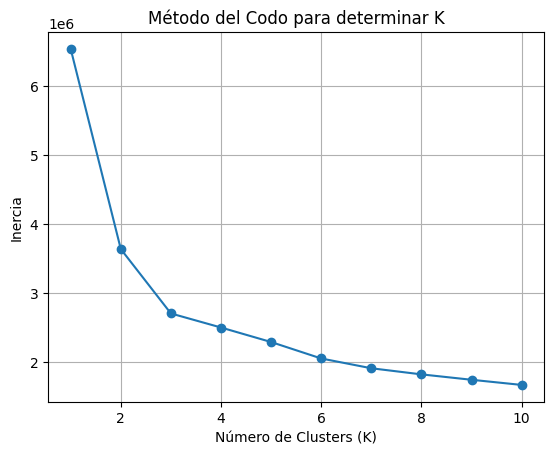

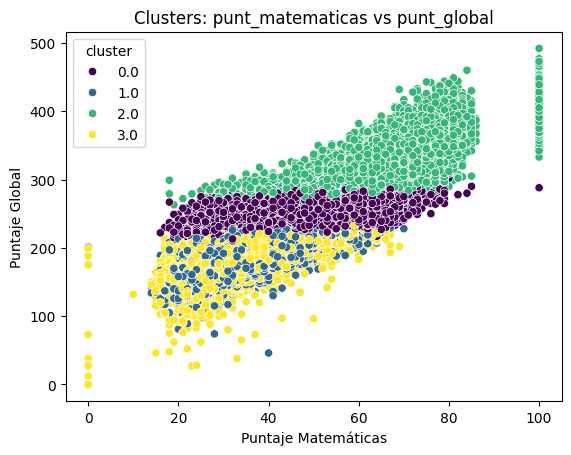

In [ ]:
# 1. Seleccionar variables numéricas (excluyendo identificadores y objetivo)
clustering_cols = df_muestra.select_dtypes(include=np.number).columns.drop(
    ['periodo', 'cole_cod_mcpio_ubicacion', 'punt_global'], errors='ignore'
)
df_clustering = df_muestra[clustering_cols].dropna()

# 2. Escalar variables numéricas
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clustering)

# 3. Método del codo para determinar número óptimo de clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método del Codo para determinar K')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inercia')
plt.grid(True)
plt.show()

# 4. Entrenar modelo KMeans con número elegido (por ejemplo, K=4)
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
clusters = kmeans.fit_predict(df_scaled)

# 5. Agregar resultados al dataframe original
df_muestra.loc[df_clustering.index, 'cluster'] = clusters

# 6. Visualización básica de clusters
sns.scatterplot(data=df_muestra, x='punt_matematicas', y='punt_global', hue='cluster', palette='viridis')
plt.title('Clusters: punt_matematicas vs punt_global')
plt.xlabel('Puntaje Matemáticas')
plt.ylabel('Puntaje Global')
plt.show()


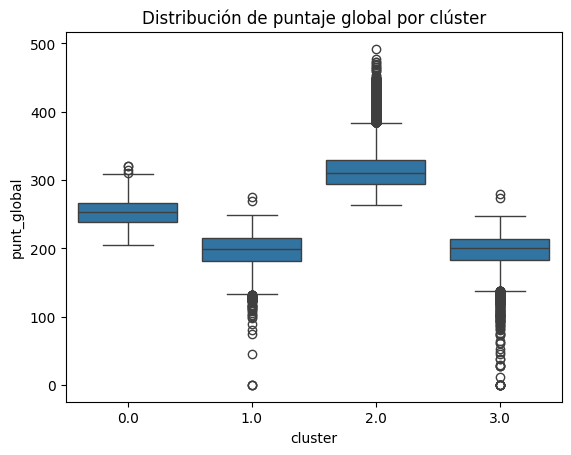

In [ ]:
sns.boxplot(data=df_muestra, x='cluster', y='punt_global')
plt.title('Distribución de puntaje global por clúster')
plt.show()


===== Análisis Sociodemográfico por Clúster =====

--- Variable: estu_genero ---
Tabla de Frecuencia por Clúster:
estu_genero      F      M
cluster                  
0.0          88523  73391
1.0          44931  30383
2.0          58546  61661
3.0          44153  34152

Proporción por Clúster:
estu_genero         F         M
cluster                        
0.0          0.546729  0.453271
1.0          0.596582  0.403418
2.0          0.487043  0.512957
3.0          0.563859  0.436141


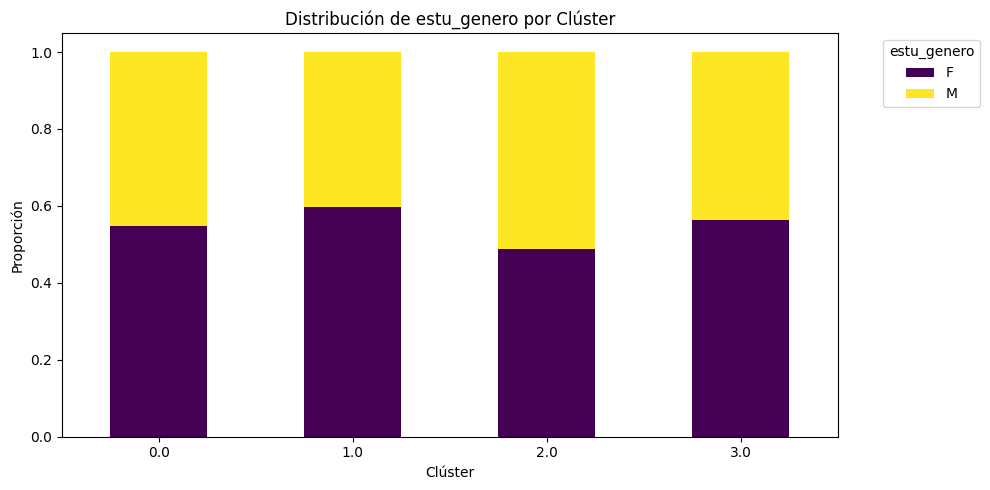


--- Variable: estu_nse_individual ---
Tabla de Frecuencia por Clúster:
estu_nse_individual    1.0    2.0    3.0    4.0  NSE1   NSE2   NSE3  NSE4
cluster                                                                  
0.0                  16309  50014  49889   5487  6349  16947  15172  1747
1.0                  26627  25272   1957     12  9595  10989    861     1
2.0                   3901  21717  47262  17047  1527   7519  15264  5970
3.0                   3607  31393  27217   1520   598   6591   6941   438

Proporción por Clúster:
estu_nse_individual       1.0       2.0       3.0       4.0      NSE1  \
cluster                                                                 
0.0                  0.100726  0.308892  0.308120  0.033888  0.039212   
1.0                  0.353546  0.335555  0.025985  0.000159  0.127400   
2.0                  0.032452  0.180663  0.393172  0.141814  0.012703   
3.0                  0.046063  0.400907  0.347577  0.019411  0.007637   

estu_nse_individual 

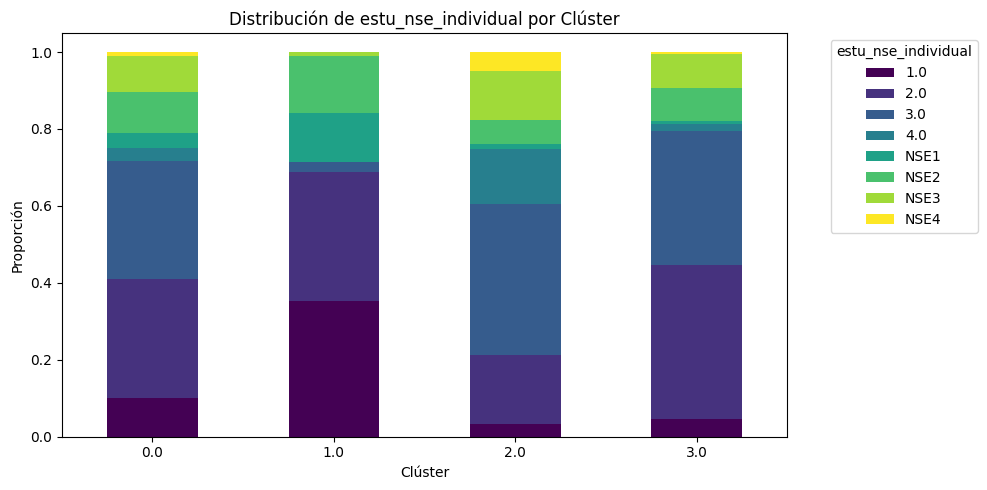


--- Variable: estu_discapacidad ---
Tabla de Frecuencia por Clúster:
estu_discapacidad       N     S
cluster                        
0.0                160348  1566
1.0                 74697   617
2.0                119609   598
3.0                 76822  1483

Proporción por Clúster:
estu_discapacidad         N         S
cluster                              
0.0                0.990328  0.009672
1.0                0.991808  0.008192
2.0                0.995025  0.004975
3.0                0.981061  0.018939


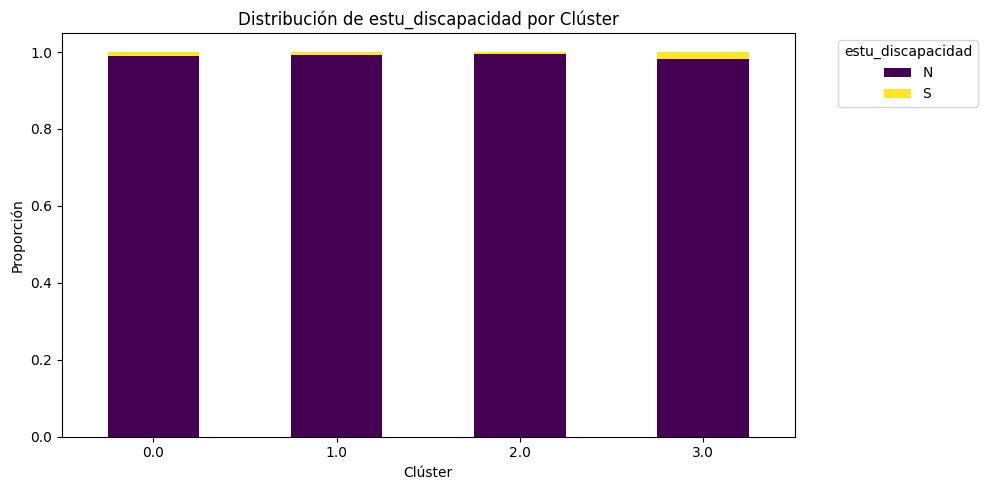


--- Variable: estu_dedicacioninternet ---
Tabla de Frecuencia por Clúster:
estu_dedicacioninternet  30 minutos o menos  Entre 1 y 3 horas  \
cluster                                                          
0.0                                   23350              55241   
1.0                                   20081              14436   
2.0                                   10332              48746   
3.0                                   11608              28677   

estu_dedicacioninternet  Entre 30 y 60 minutos  Más de 3 horas  \
cluster                                                          
0.0                                      41501           35018   
1.0                                      22995            6708   
2.0                                      24371           34278   
3.0                                      19543           16095   

estu_dedicacioninternet  No Navega Internet  
cluster                                      
0.0                                   

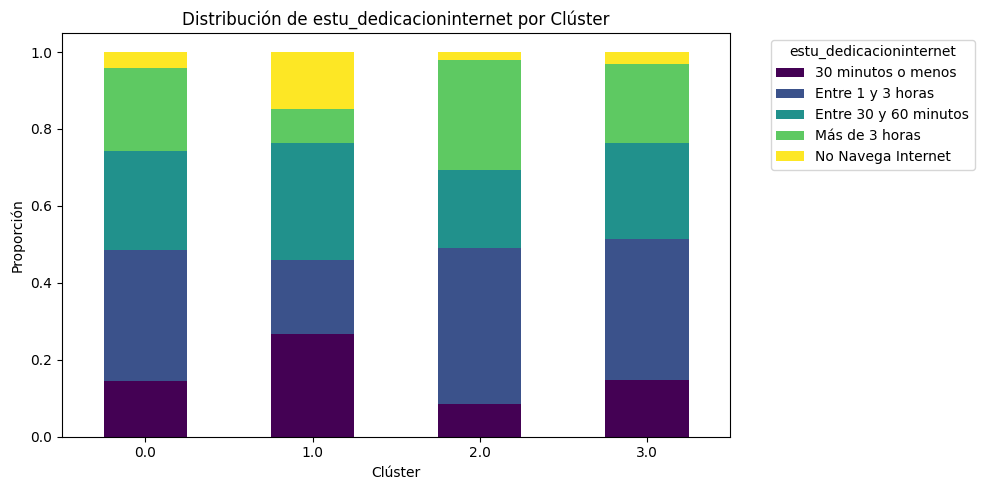


--- Variable: fami_estratovivienda ---
Tabla de Frecuencia por Clúster:
fami_estratovivienda  Estrato 1  Estrato 2  Estrato 3  Estrato 4  Estrato 5  \
cluster                                                                       
0.0                       53413      64855      32504       5531       1482   
1.0                       38892      18863       6389       2182        973   
2.0                       23956      45143      35712      10260       2926   
3.0                       22082      31281      15801       3971       1335   

fami_estratovivienda  Estrato 6  Sin Estrato  
cluster                                       
0.0                         623         3506  
1.0                         717         7298  
2.0                        1091         1119  
3.0                         763         3072  

Proporción por Clúster:
fami_estratovivienda  Estrato 1  Estrato 2  Estrato 3  Estrato 4  Estrato 5  \
cluster                                                           

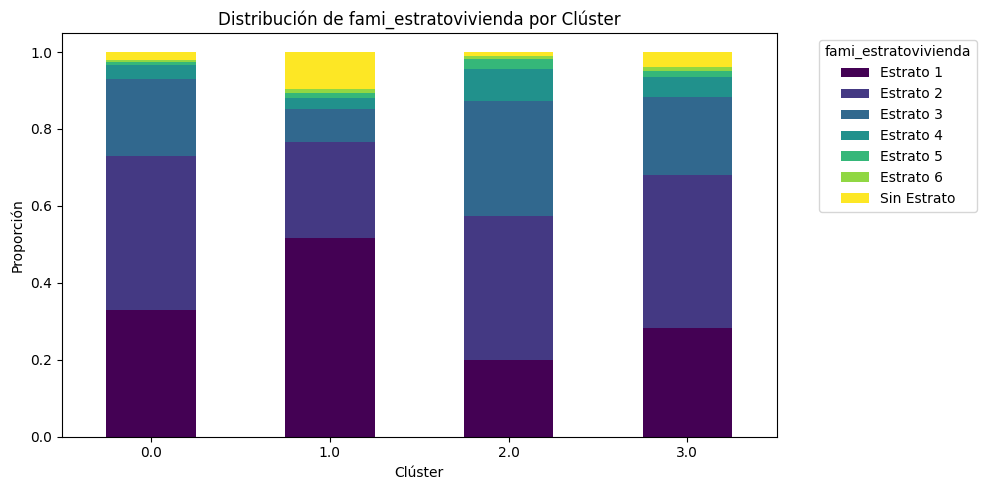


--- Variable: fami_educacionmadre ---
Tabla de Frecuencia por Clúster:
fami_educacionmadre  Educación profesional completa  \
cluster                                               
0.0                                           14825   
1.0                                            2001   
2.0                                           24658   
3.0                                            6079   

fami_educacionmadre  Educación profesional incompleta  Ninguno  No Aplica  \
cluster                                                                     
0.0                                              3746     2287        242   
1.0                                               661     4180        225   
2.0                                              5221      574        217   
3.0                                              1388     1965        220   

fami_educacionmadre  No sabe  Postgrado  Primaria completa  \
cluster                                                      
0.0       

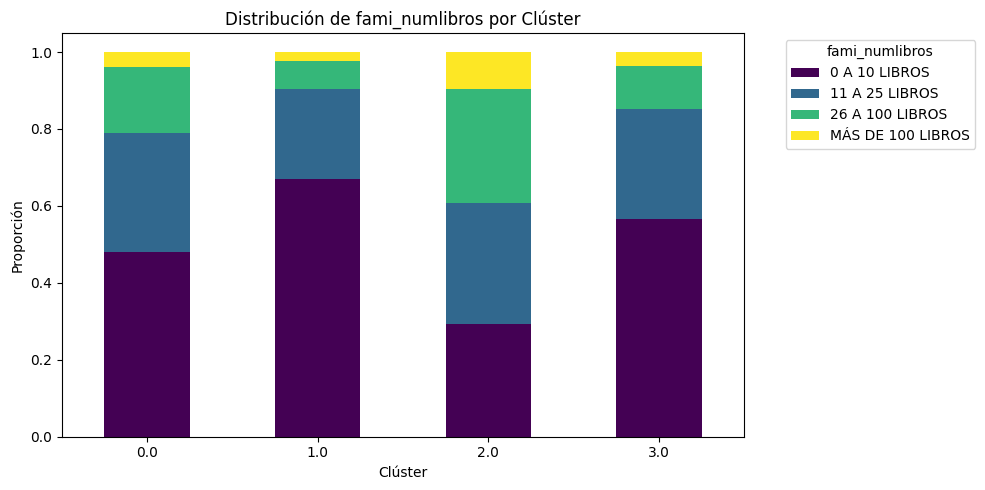


--- Variable: fami_personashogar ---
Tabla de Frecuencia por Clúster:
fami_personashogar  1 a 2  3 a 4  5 a 6  7 a 8  9 o más
cluster                                                
0.0                 12506  84786  49328  11292     4002
1.0                  6371  30305  25649   8999     3990
2.0                  9494  71621  31444   5720     1928
3.0                  6794  38286  23505   6778     2942

Proporción por Clúster:
fami_personashogar     1 a 2     3 a 4     5 a 6     7 a 8   9 o más
cluster                                                             
0.0                 0.077239  0.523648  0.304656  0.069741  0.024717
1.0                 0.084593  0.402382  0.340561  0.119486  0.052978
2.0                 0.078980  0.595814  0.261582  0.047585  0.016039
3.0                 0.086763  0.488934  0.300172  0.086559  0.037571


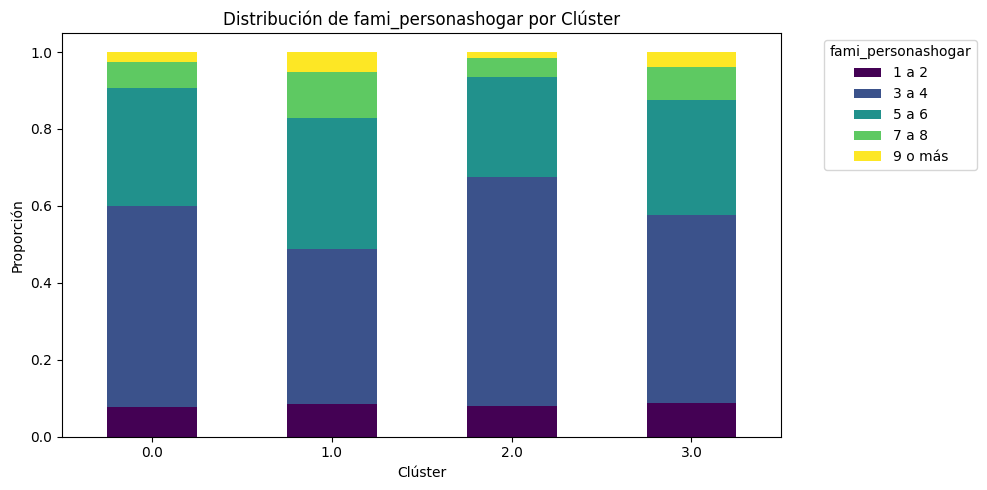


--- Variable: fami_tieneinternet ---
Tabla de Frecuencia por Clúster:
fami_tieneinternet     No      Si
cluster                          
0.0                 49868  112046
1.0                 75314       0
2.0                 16716  103491
3.0                     0   78305

Proporción por Clúster:
fami_tieneinternet        No        Si
cluster                               
0.0                 0.307991  0.692009
1.0                 1.000000  0.000000
2.0                 0.139060  0.860940
3.0                 0.000000  1.000000


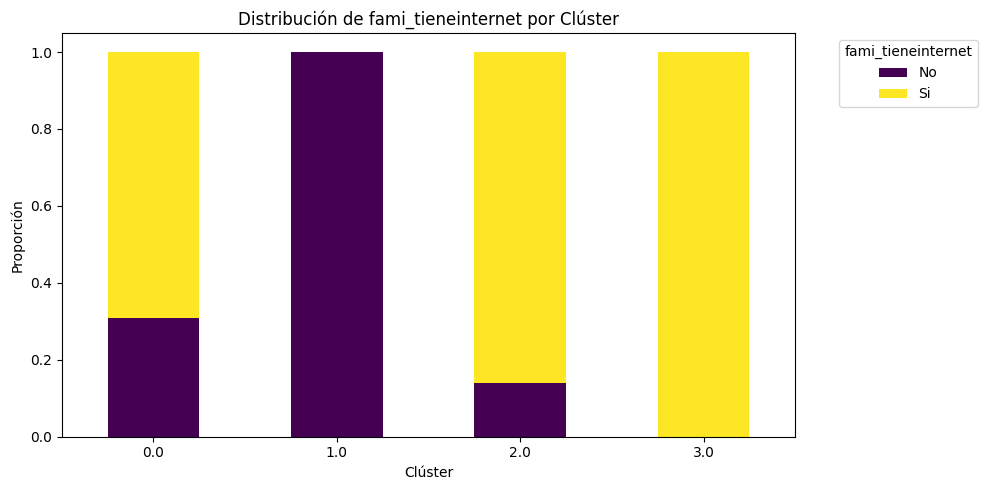


--- Variable: fami_tienecomputador ---
Tabla de Frecuencia por Clúster:
fami_tienecomputador     No     Si
cluster                           
0.0                   70679  91235
1.0                   63272  12042
2.0                   26053  94154
3.0                   32624  45681

Proporción por Clúster:
fami_tienecomputador        No        Si
cluster                                 
0.0                   0.436522  0.563478
1.0                   0.840109  0.159891
2.0                   0.216734  0.783266
3.0                   0.416627  0.583373


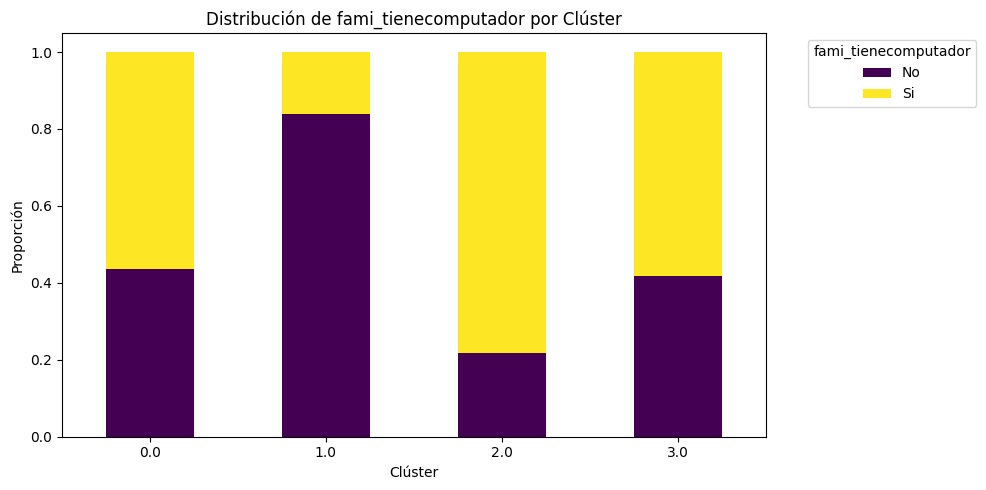


--- Variable: fami_tieneconsolavideojuegos ---
Tabla de Frecuencia por Clúster:
fami_tieneconsolavideojuegos      No     Si
cluster                                    
0.0                           133131  28783
1.0                            70770   4544
2.0                            85347  34860
3.0                            62661  15644

Proporción por Clúster:
fami_tieneconsolavideojuegos        No        Si
cluster                                         
0.0                           0.822233  0.177767
1.0                           0.939666  0.060334
2.0                           0.710000  0.290000
3.0                           0.800217  0.199783


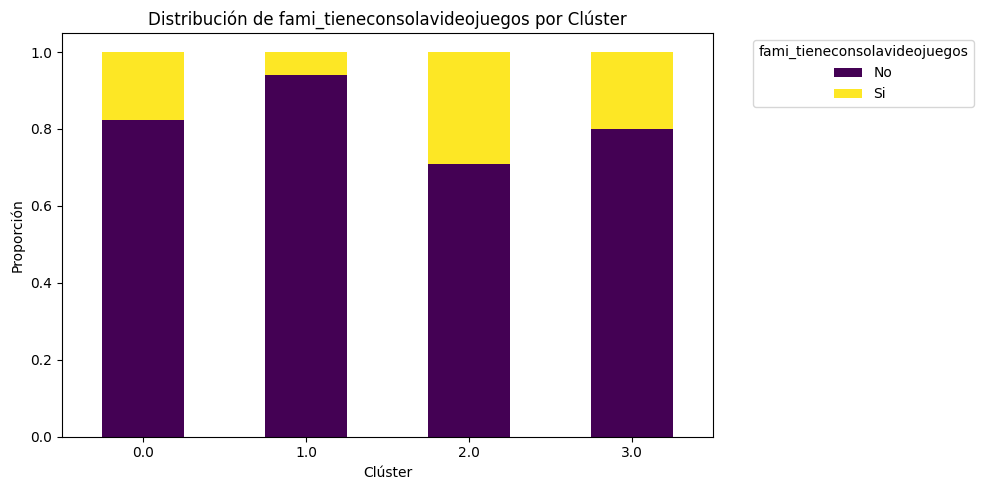


--- Variable: fami_cuartoshogar ---
Tabla de Frecuencia por Clúster:
fami_cuartoshogar  Cinco  Cuatro    Dos  Seis o mas   Tres   Uno
cluster                                                         
0.0                 5442   19535  61455        2855  64813  7814
1.0                 2795    8511  31995        1540  23832  6641
2.0                 3641   14064  42439        1834  54184  4045
3.0                 3793   11213  25854        2281  31060  4104

Proporción por Clúster:
fami_cuartoshogar     Cinco    Cuatro       Dos  Seis o mas      Tres  \
cluster                                                                 
0.0                0.033610  0.120650  0.379553    0.017633  0.400293   
1.0                0.037111  0.113007  0.424821    0.020448  0.316435   
2.0                0.030289  0.116998  0.353049    0.015257  0.450756   
3.0                0.048439  0.143196  0.330170    0.029130  0.396654   

fami_cuartoshogar       Uno  
cluster                      
0.0             

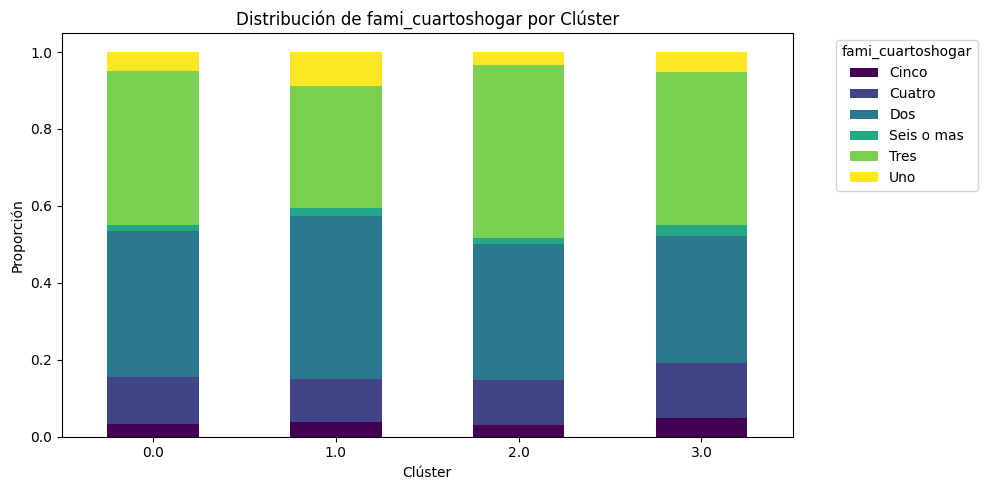


--- Variable: cole_naturaleza ---
Tabla de Frecuencia por Clúster:
cole_naturaleza  NO OFICIAL  OFICIAL
cluster                             
0.0                   30272   131642
1.0                    6817    68497
2.0                   45400    74807
3.0                   16532    61773

Proporción por Clúster:
cole_naturaleza  NO OFICIAL   OFICIAL
cluster                              
0.0                0.186963  0.813037
1.0                0.090514  0.909486
2.0                0.377682  0.622318
3.0                0.211123  0.788877


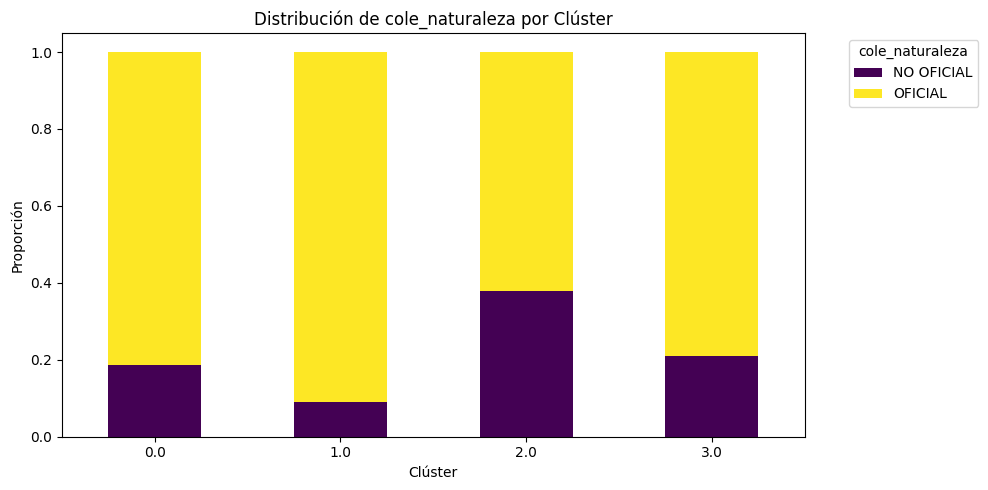


--- Variable: cole_area_ubicacion ---
Tabla de Frecuencia por Clúster:
cole_area_ubicacion  RURAL  URBANO
cluster                           
0.0                  23631  138283
1.0                  27315   47999
2.0                   9232  110975
3.0                  11338   66967

Proporción por Clúster:
cole_area_ubicacion     RURAL    URBANO
cluster                                
0.0                  0.145948  0.854052
1.0                  0.362682  0.637318
2.0                  0.076801  0.923199
3.0                  0.144793  0.855207


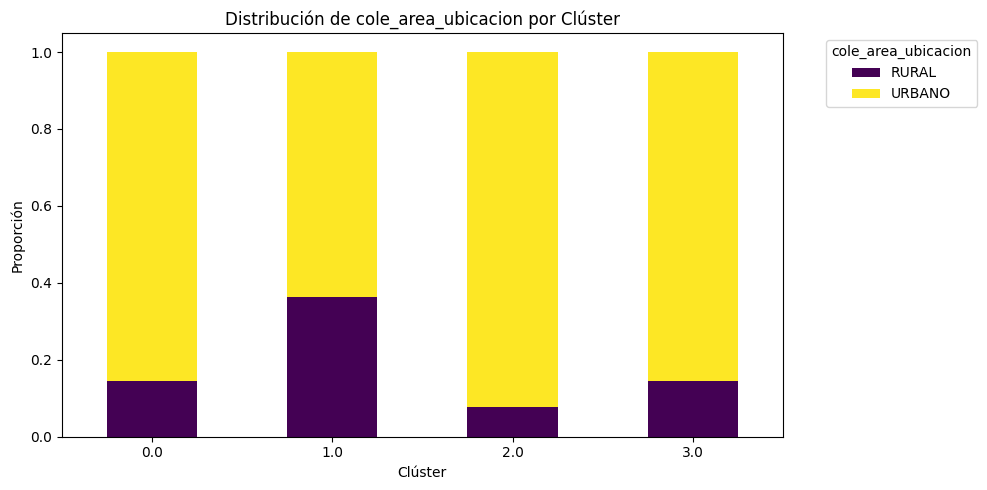


--- Variable: cole_caracter ---
Tabla de Frecuencia por Clúster:
cole_caracter  ACADÉMICO  NO APLICA  TÉCNICO  TÉCNICO/ACADÉMICO
cluster                                                        
0.0                83196       1904    17902              58912
1.0                37695       1838    11133              24648
2.0                69763       1266    10629              38549
3.0                40810       1208     8190              28097

Proporción por Clúster:
cole_caracter  ACADÉMICO  NO APLICA   TÉCNICO  TÉCNICO/ACADÉMICO
cluster                                                         
0.0             0.513828   0.011759  0.110565           0.363847
1.0             0.500505   0.024404  0.147821           0.327270
2.0             0.580357   0.010532  0.088422           0.320688
3.0             0.521167   0.015427  0.104591           0.358815


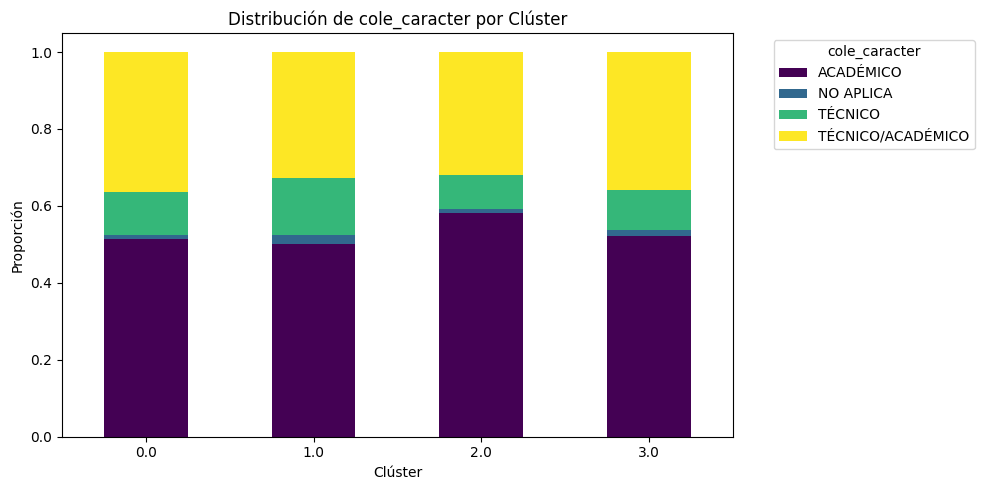


--- Variable: cole_jornada ---
Tabla de Frecuencia por Clúster:
cole_jornada  COMPLETA  MAÑANA  NOCHE  SABATINA  TARDE  UNICA
cluster                                                      
0.0              21210   73416   5294      6264  18306  37424
1.0               6648   33457   6754      8406   6878  13171
2.0              34364   48874    959      1078  10647  24285
3.0               5745   31389   8050      8865   8693  15563

Proporción por Clúster:
cole_jornada  COMPLETA    MAÑANA     NOCHE  SABATINA     TARDE     UNICA
cluster                                                                 
0.0           0.130995  0.453426  0.032696  0.038687  0.113060  0.231135
1.0           0.088270  0.444233  0.089678  0.111613  0.091324  0.174881
2.0           0.285874  0.406582  0.007978  0.008968  0.088572  0.202027
3.0           0.073367  0.400856  0.102803  0.113211  0.111015  0.198748


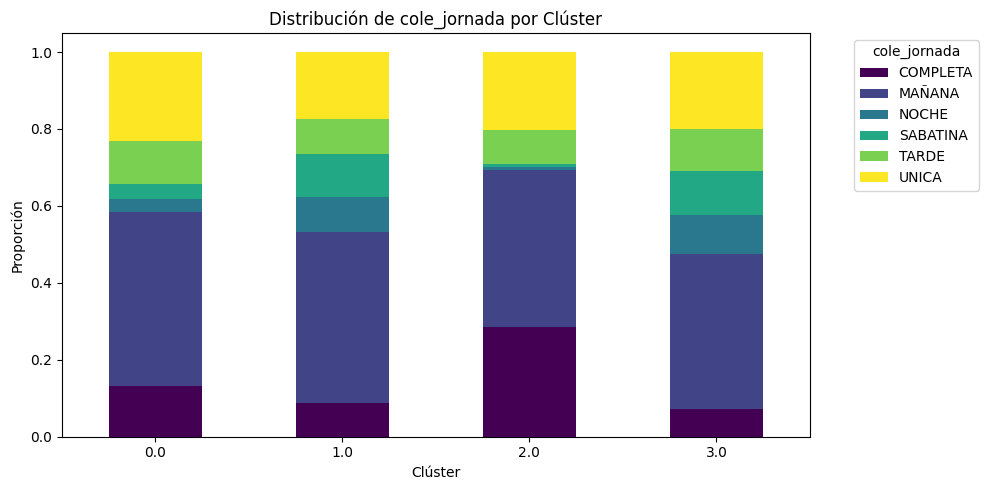


--- Variable: cole_bilingue ---
Tabla de Frecuencia por Clúster:
cole_bilingue       N     S
cluster                    
0.0            160441  1473
1.0             73960  1354
2.0            118976  1231
3.0             77472   833

Proporción por Clúster:
cole_bilingue         N         S
cluster                          
0.0            0.990903  0.009097
1.0            0.982022  0.017978
2.0            0.989759  0.010241
3.0            0.989362  0.010638


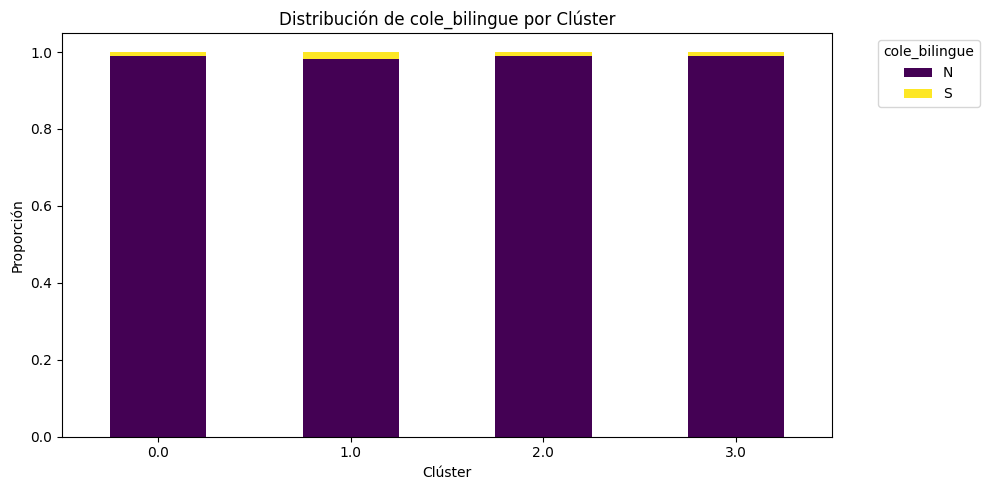


--- Variable: edad ---
Estadísticas Descriptivas por Clúster:
            count       mean       std  min        25%        50%        75%  \
cluster                                                                        
0.0      161914.0  17.548345  1.248621  0.0  17.000000  17.693119  17.693119   
1.0       75314.0  18.062662  3.014837 -4.0  17.693119  17.693119  17.693119   
2.0      120207.0  17.388666  1.033563  0.0  17.000000  17.693119  17.693119   
3.0       78305.0  18.084586  3.461980  0.0  17.693119  17.693119  17.693119   

           max  
cluster         
0.0      123.0  
1.0      124.0  
2.0      123.0  
3.0      124.0  


<ipython-input-33-a630f4fcee6f>:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=var, data=df_muestra, palette='viridis')


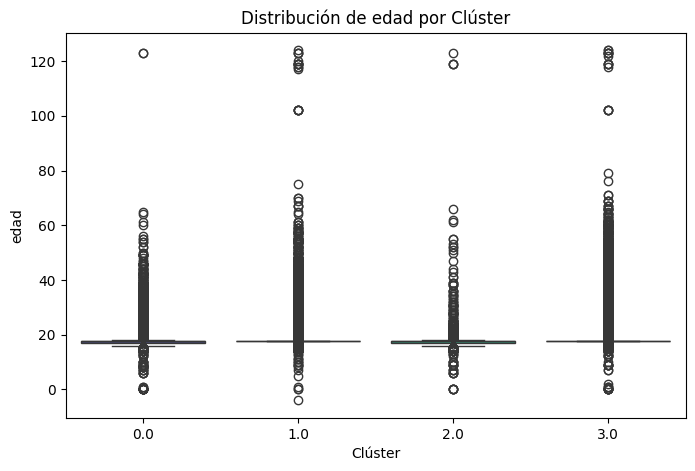


Análisis sociodemográfico por clúster completado.


In [ ]:
# prompt: Variables sociodemograficas por cluester

# Análisis de las variables sociodemográficas por clúster

# Variables categóricas y numéricas a incluir en el análisis sociodemográfico por clúster
sociodemographic_vars = [
    'estu_genero',
    'estu_nse_individual',
    'estu_discapacidad',
    'estu_dedicacioninternet',
    'fami_estratovivienda',
    'fami_educacionmadre',
    'fami_educacionpadre',
    'fami_numlibros',
    'fami_personashogar',
    'fami_tieneinternet',
    'fami_tienecomputador',
    'fami_tieneconsolavideojuegos',
    'fami_cuartoshogar',
    'cole_naturaleza',
    'cole_area_ubicacion',
    'cole_caracter',
    'cole_jornada',
    'cole_bilingue',
    'edad'
]

print("\n===== Análisis Sociodemográfico por Clúster =====")

for var in sociodemographic_vars:
    if var in df_muestra.columns and 'cluster' in df_muestra.columns:
        print(f"\n--- Variable: {var} ---")

        if df_muestra[var].dtype in ['category', 'object', 'bool']:
            # Análisis para variables categóricas
            # Tabla de frecuencia por clúster
            cross_tab = pd.crosstab(df_muestra['cluster'], df_muestra[var])
            print("Tabla de Frecuencia por Clúster:")
            print(cross_tab)

            # Proporción por clúster
            proportion_tab = cross_tab.divide(cross_tab.sum(axis=1), axis=0)
            print("\nProporción por Clúster:")
            print(proportion_tab)

            # Visualización (si el número de categorías es manejable)
            if df_muestra[var].nunique() < 10:
                plt.figure(figsize=(10, 5))
                proportion_tab.plot(kind='bar', stacked=True, colormap='viridis', ax=plt.gca())
                plt.title(f'Distribución de {var} por Clúster')
                plt.xlabel('Clúster')
                plt.ylabel('Proporción')
                plt.xticks(rotation=0)
                plt.legend(title=var, bbox_to_anchor=(1.05, 1), loc='upper left')
                plt.tight_layout()
                plt.show()
            else:
                print(f"Variable '{var}' tiene demasiadas categorías para visualizar fácilmente.")

        elif df_muestra[var].dtype in ['int64', 'float64']:
            # Análisis para variables numéricas
            # Estadísticas descriptivas por clúster (media, mediana, std)
            desc_stats = df_muestra.groupby('cluster')[var].describe()
            print("Estadísticas Descriptivas por Clúster:")
            print(desc_stats)

            # Visualización: Boxplot
            plt.figure(figsize=(8, 5))
            sns.boxplot(x='cluster', y=var, data=df_muestra, palette='viridis')
            plt.title(f'Distribución de {var} por Clúster')
            plt.xlabel('Clúster')
            plt.ylabel(var)
            plt.show()
        else:
            print(f"Tipo de dato desconocido para la variable '{var}': {df_muestra[var].dtype}")

    else:
        print(f"Variable '{var}' o 'cluster' no encontrada en el DataFrame de muestra.")

print("\nAnálisis sociodemográfico por clúster completado.")